In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import os

# Define column names
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names
print(col_names)

# Convert TXT to CSV with enforced data types
def convert_txt_to_csv(txt_file, csv_file):
    if not os.path.exists(csv_file):
        print(f"Converting {txt_file} → {csv_file}")
        df = pd.read_csv(txt_file, sep='\s+', header=None, names=col_names)
        for col in col_names[1:]:  # all except unit_number
            df[col] = pd.to_numeric(df[col], errors='coerce')
        df.dropna(inplace=True)
    else:
        print(f"{csv_file} already exists")


# Convert all datasets
convert_txt_to_csv('train_FD001.txt', 'train_FD001.csv')
convert_txt_to_csv('train_FD002.txt', 'train_FD002.csv')
convert_txt_to_csv('train_FD003.txt', 'train_FD003.csv')
convert_txt_to_csv('train_FD004.txt', 'train_FD004.csv')

# Read CSVs with column names defined earlier
train_1 = pd.read_csv('train_FD001.csv', header=None, names=col_names)
train_2 = pd.read_csv('train_FD002.csv', header=None, names=col_names)
train_3 = pd.read_csv('train_FD003.csv', header=None, names=col_names)
train_4 = pd.read_csv('train_FD004.csv', header=None, names=col_names)

# ✅ Enforce numeric types again after loading (in case any column is read as object)
for col in col_names[1:]:  # skip 'unit_number'
    train_1[col] = pd.to_numeric(train_1[col], errors='coerce')
    train_2[col] = pd.to_numeric(train_2[col], errors='coerce')
    train_3[col] = pd.to_numeric(train_3[col], errors='coerce')
    train_4[col] = pd.to_numeric(train_4[col], errors='coerce')

# RUL of each sensor
grouped_data_1 = train_1.groupby('unit_number')
grouped_data_2 = train_2.groupby('unit_number')
grouped_data_3 = train_3.groupby('unit_number')
grouped_data_4 = train_4.groupby('unit_number')

# Now this will work without errors
time_cycles_average = train_1[index_names].groupby('unit_number').mean()
max_time_cycles = train_1[index_names].groupby('unit_number').max()['time_cycles']

# Calculate RUL
merged = train_1.merge(max_time_cycles.to_frame(name='max_time_cycle'), left_on='unit_number', right_index=True)
merged["RUL"] = merged["max_time_cycle"] - merged['time_cycles']
merged = merged.drop("max_time_cycle", axis=1)

df = merged

print(df.shape)

['unit_number', 'time_cycles', 'setting_1', 'setting_2', 'setting_3', 's_1', 's_2', 's_3', 's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10', 's_11', 's_12', 's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19', 's_20', 's_21']
Converting train_FD001.txt → train_FD001.csv
train_FD002.csv already exists
train_FD003.csv already exists
train_FD004.csv already exists


FileNotFoundError: [Errno 2] No such file or directory: 'train_FD001.csv'

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

train_1 = pd.read_csv('train_FD001.csv', header=None, names=col_names)
train_2 = pd.read_csv('train_FD002.csv', header=None, names=col_names)
train_3 = pd.read_csv('train_FD003.csv', header=None, names=col_names)
train_4 = pd.read_csv('train_FD004.csv', header=None, names=col_names)

#RUL of each sensor

grouped_data_1=train_1.groupby('unit_number')

grouped_data_2=train_2.groupby('unit_number')

grouped_data_3=train_3.groupby('unit_number')

grouped_data_4=train_4.groupby('unit_number')

time_cycles_average=train_1[index_names].groupby('unit_number').mean()

max_time_cycles=train_1[index_names].groupby('unit_number').max()['time_cycles']

merged = train_1.merge(max_time_cycles.to_frame(name='max_time_cycle'), left_on='unit_number',right_index=True)
merged["RUL"] = merged["max_time_cycle"] - merged['time_cycles']
merged = merged.drop("max_time_cycle", axis=1)

df=merged

print(df.shape)

(20631, 27)


In [67]:
df.dropna(inplace=True)
# Check for missing values
print("Missing Values Check:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


# Check data types
print("\nData Types:")
print(df.dtypes)

Missing Values Check:
Series([], dtype: int64)

Data Types:
unit_number      int64
time_cycles      int64
setting_1      float64
setting_2      float64
setting_3      float64
s_1            float64
s_2            float64
s_3            float64
s_4            float64
s_5            float64
s_6            float64
s_7            float64
s_8            float64
s_9            float64
s_10           float64
s_11           float64
s_12           float64
s_13           float64
s_14           float64
s_15           float64
s_16           float64
s_17             int64
s_18             int64
s_19           float64
s_20           float64
s_21           float64
RUL              int64
dtype: object


In [68]:
# Check for outliers using IQR method
print("\nOutlier Analysis:")
for sensor in sensor_names:
    Q1 = df[sensor].quantile(0.25)
    Q3 = df[sensor].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[sensor] < (Q1 - 1.5 * IQR)) | (df[sensor] > (Q3 + 1.5 * IQR))][sensor]
    if len(outliers) > 0:
        print(f"{sensor}: {len(outliers)} outliers detected")


Outlier Analysis:
s_2: 128 outliers detected
s_3: 165 outliers detected
s_4: 120 outliers detected
s_6: 406 outliers detected
s_7: 110 outliers detected
s_8: 320 outliers detected
s_9: 1686 outliers detected
s_11: 167 outliers detected
s_12: 146 outliers detected
s_13: 161 outliers detected
s_14: 1543 outliers detected
s_15: 120 outliers detected
s_17: 81 outliers detected
s_20: 117 outliers detected
s_21: 136 outliers detected


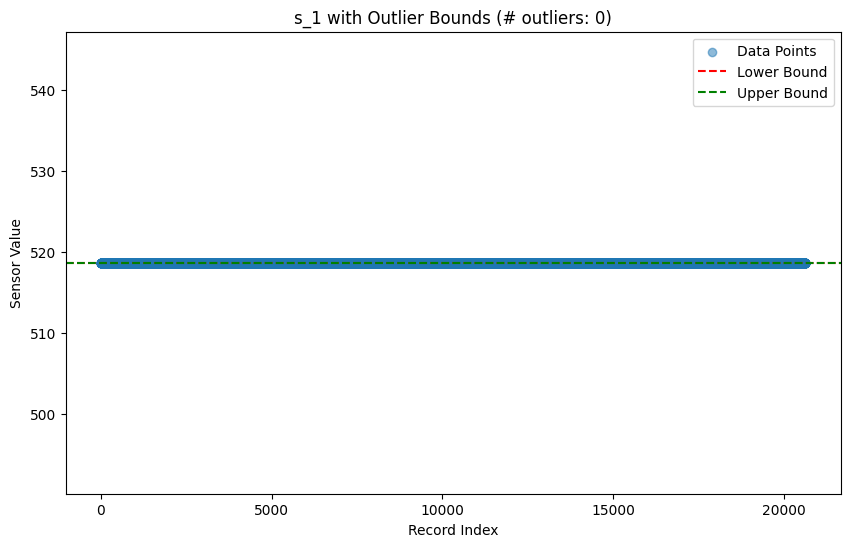

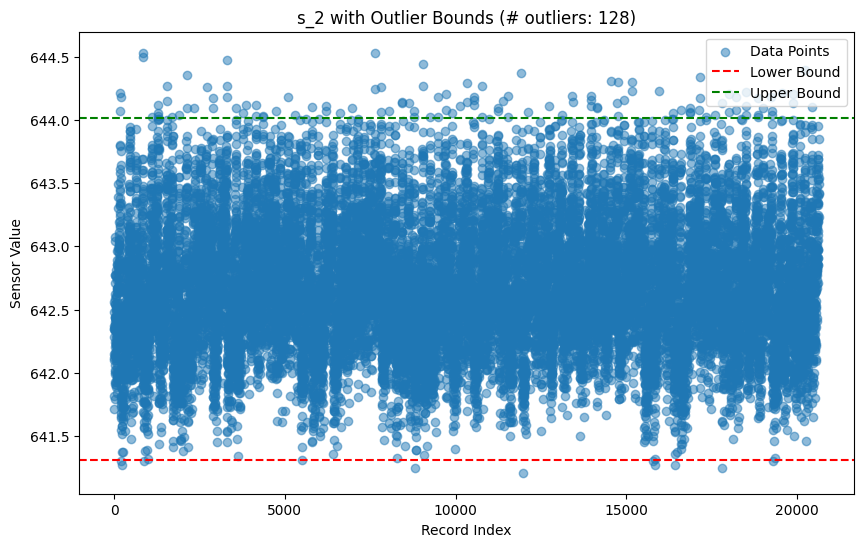

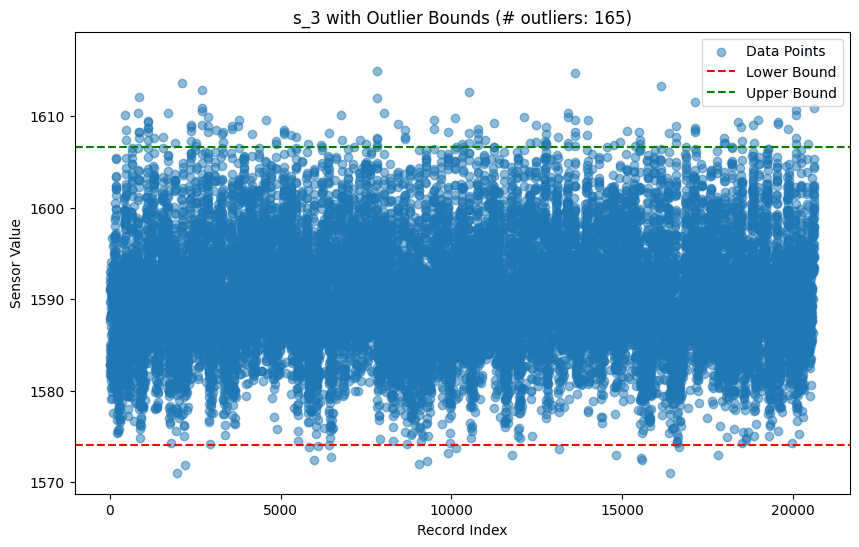

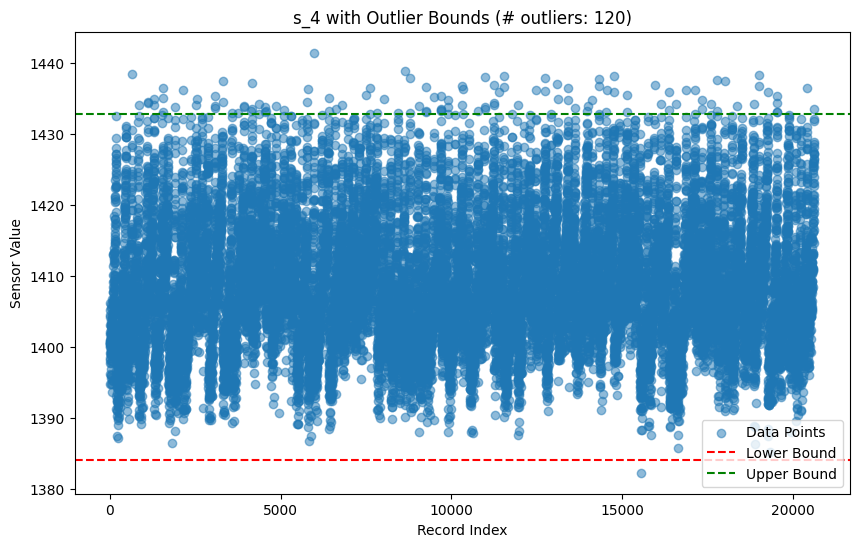

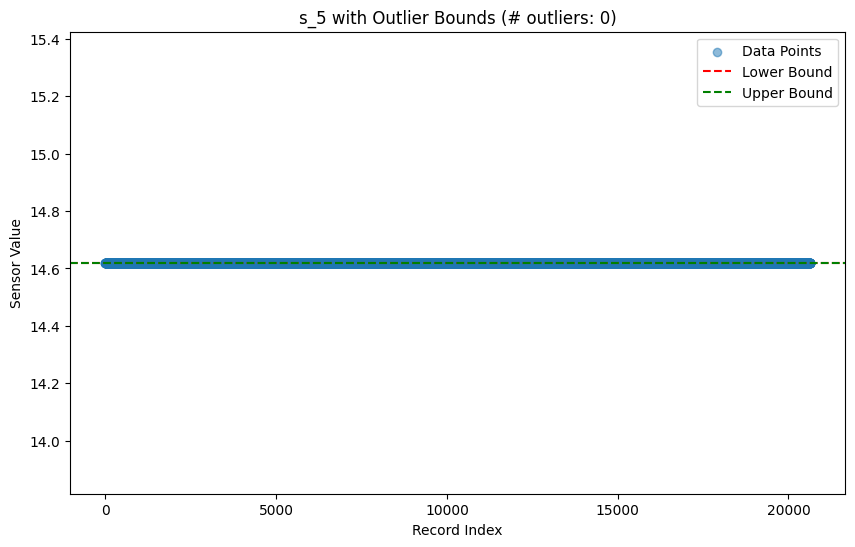

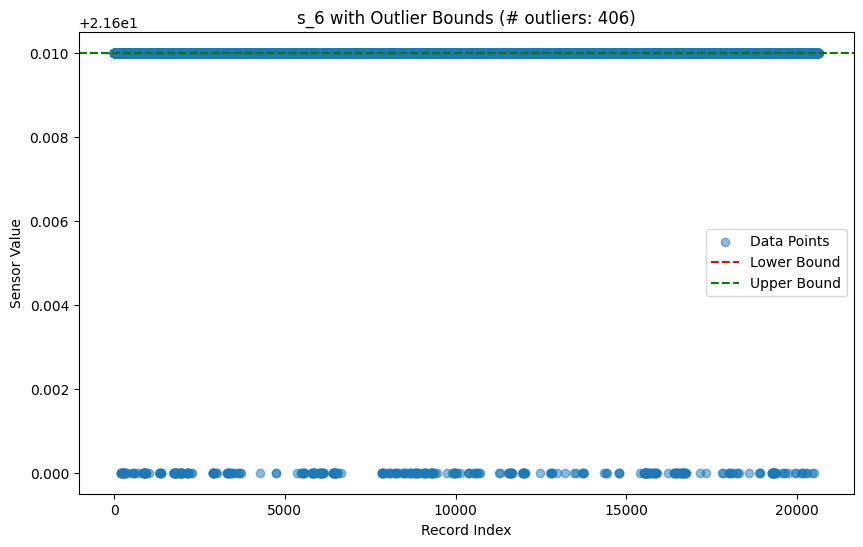

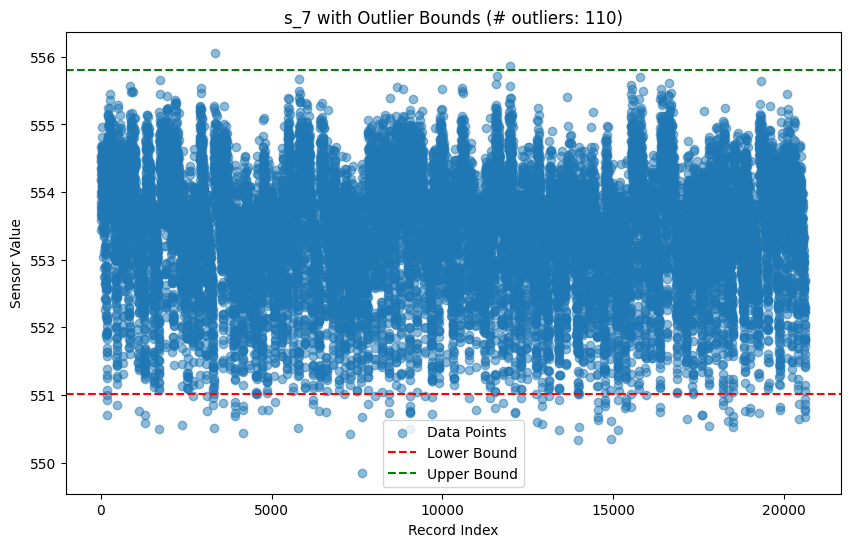

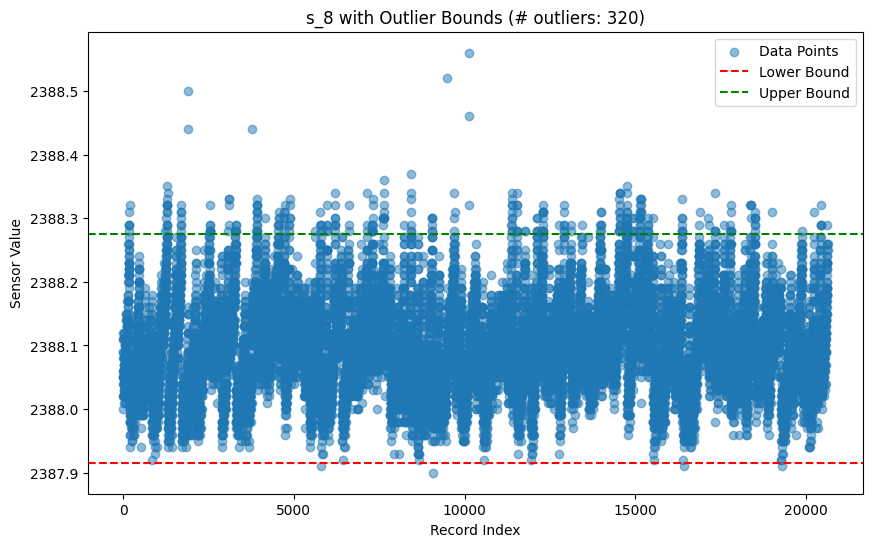

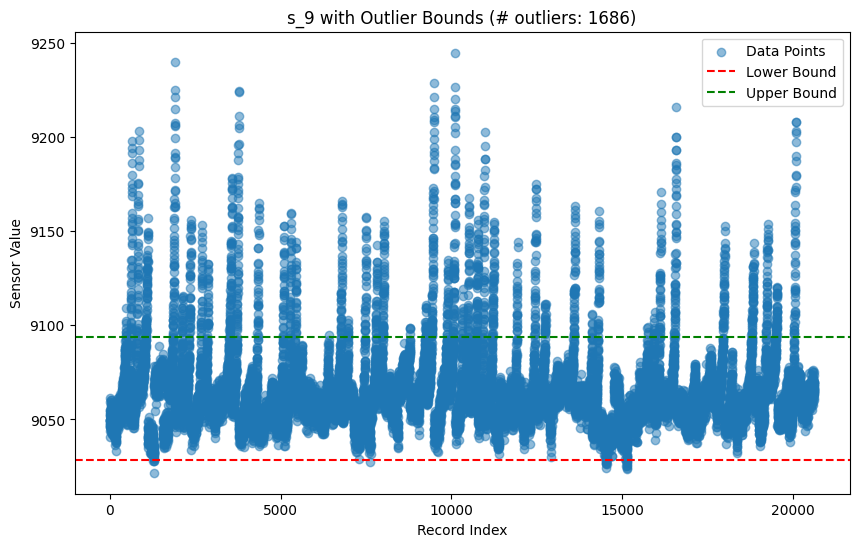

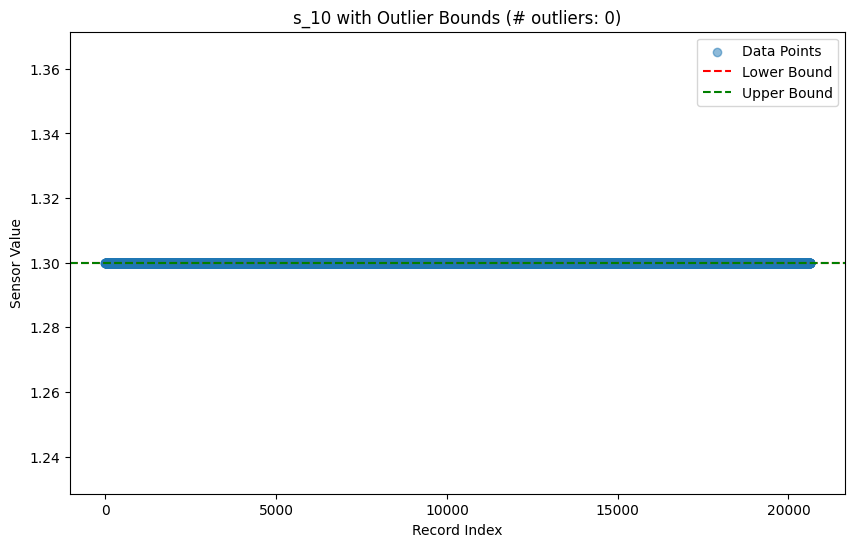

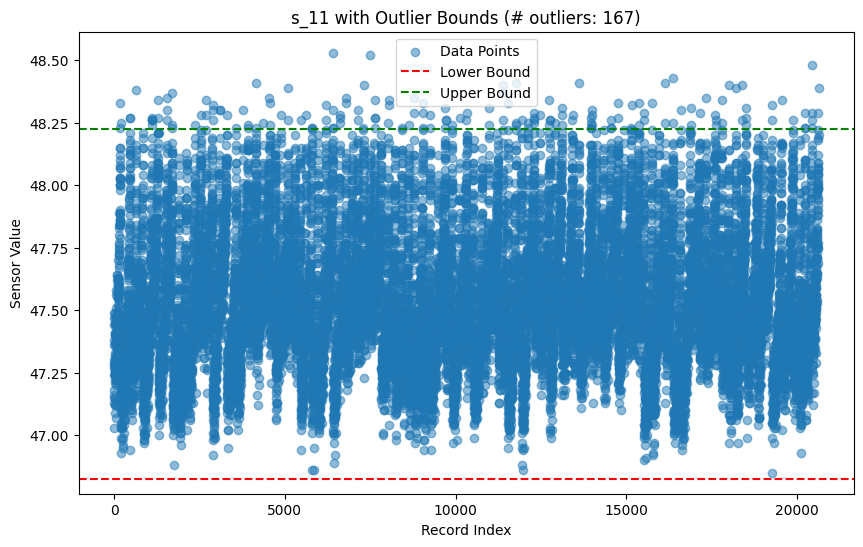

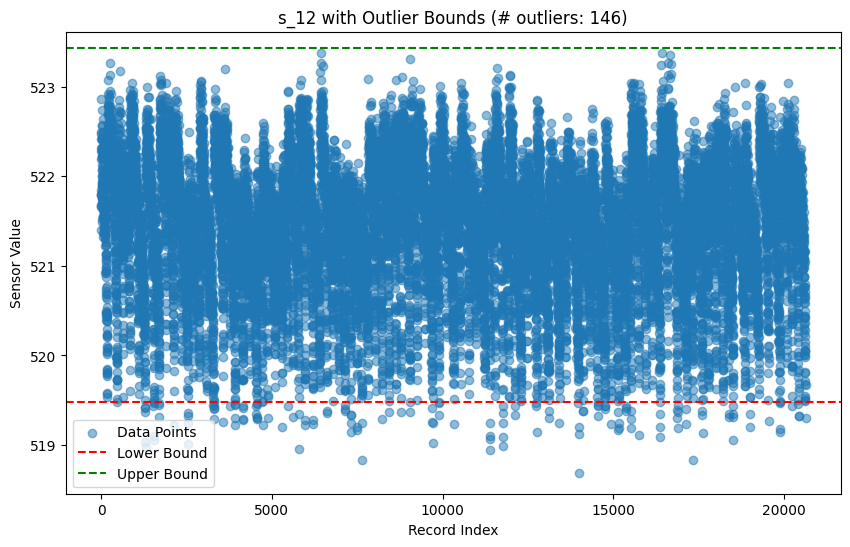

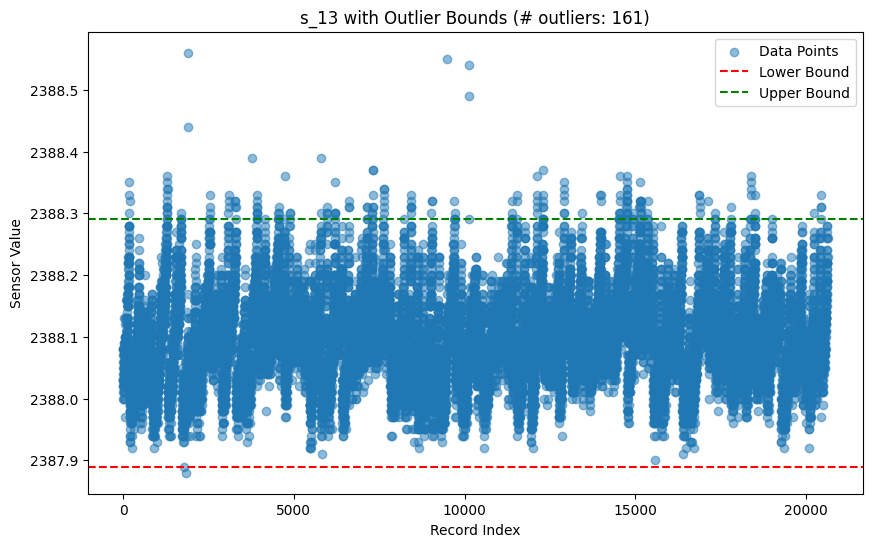

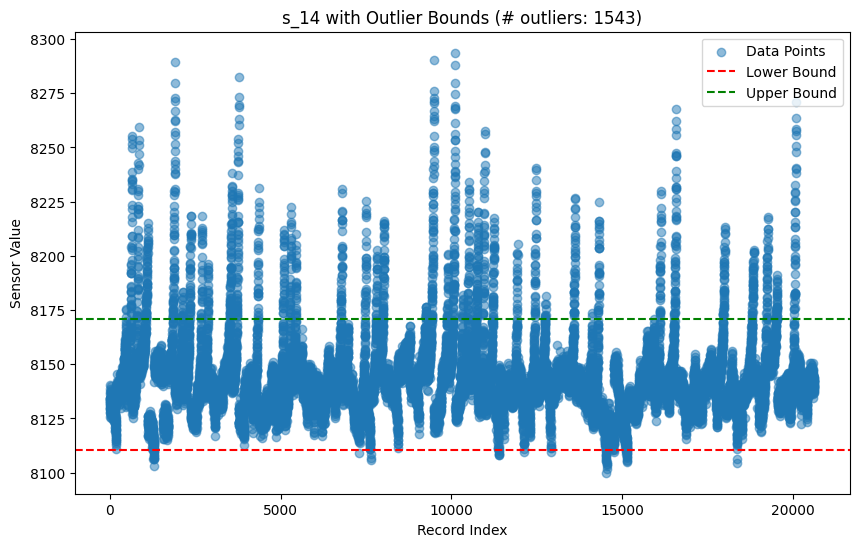

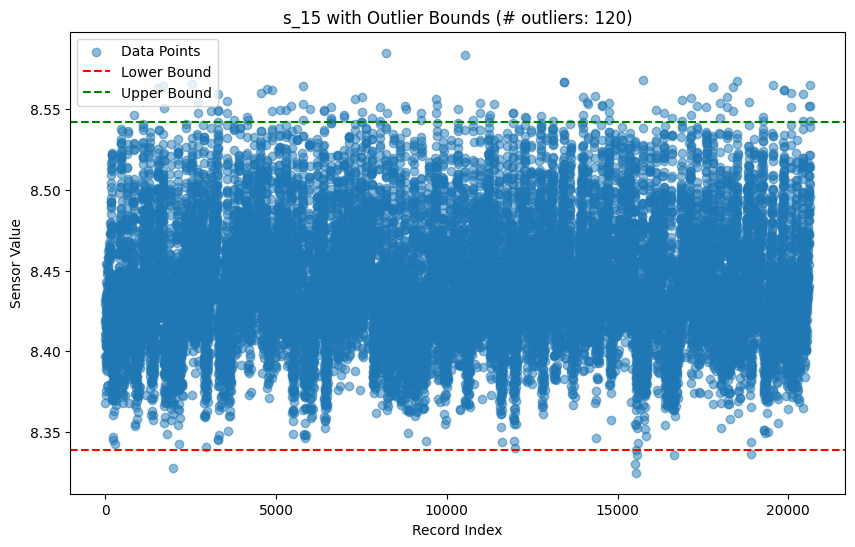

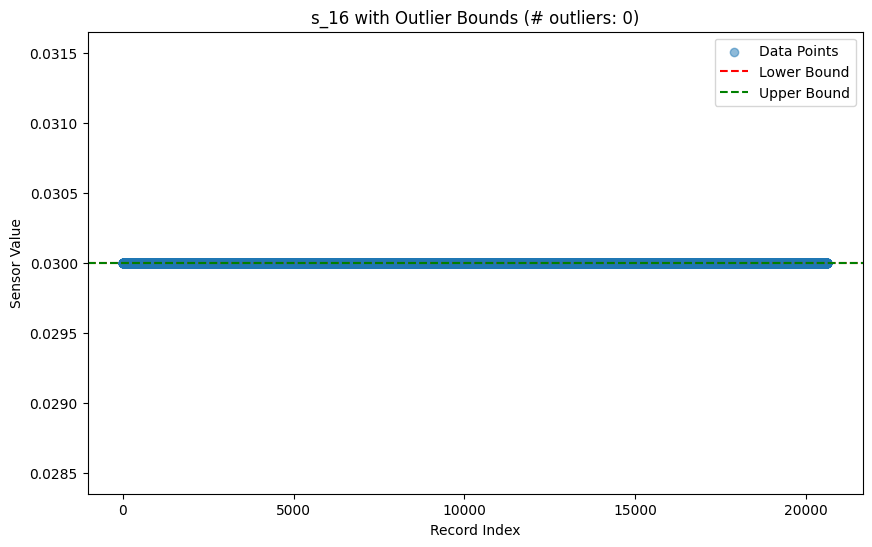

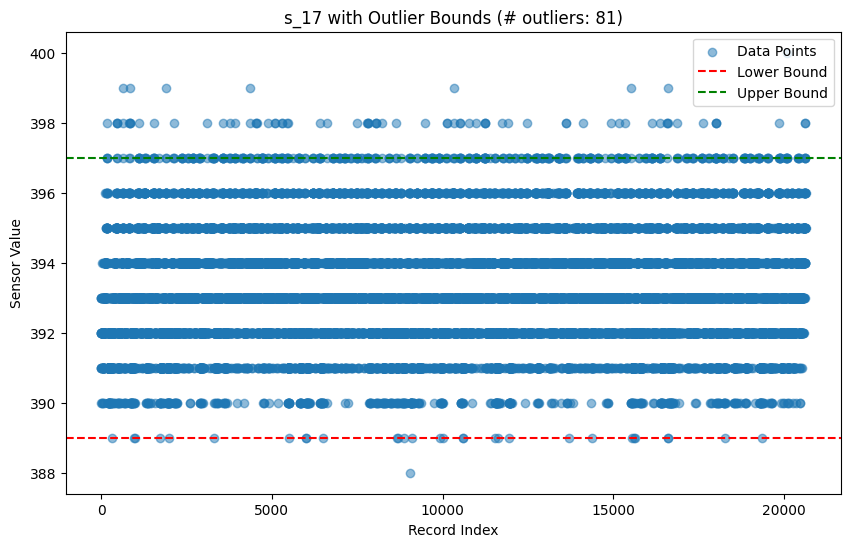

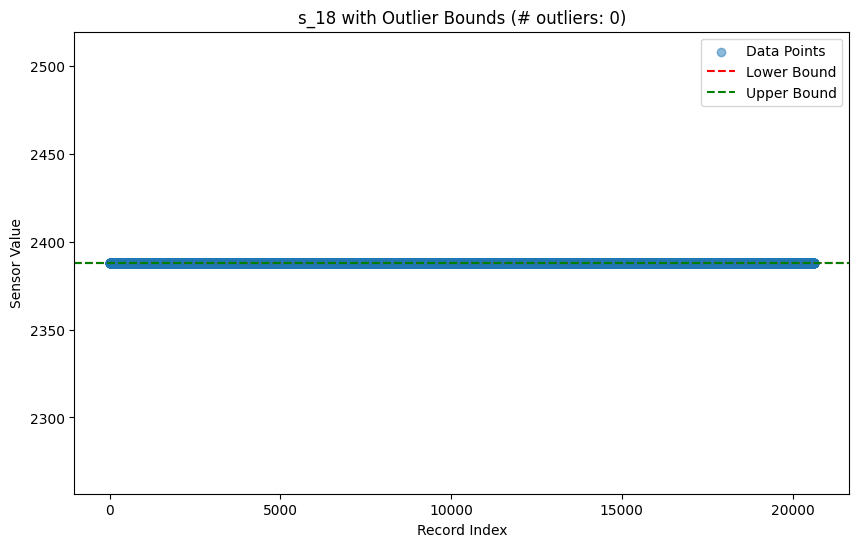

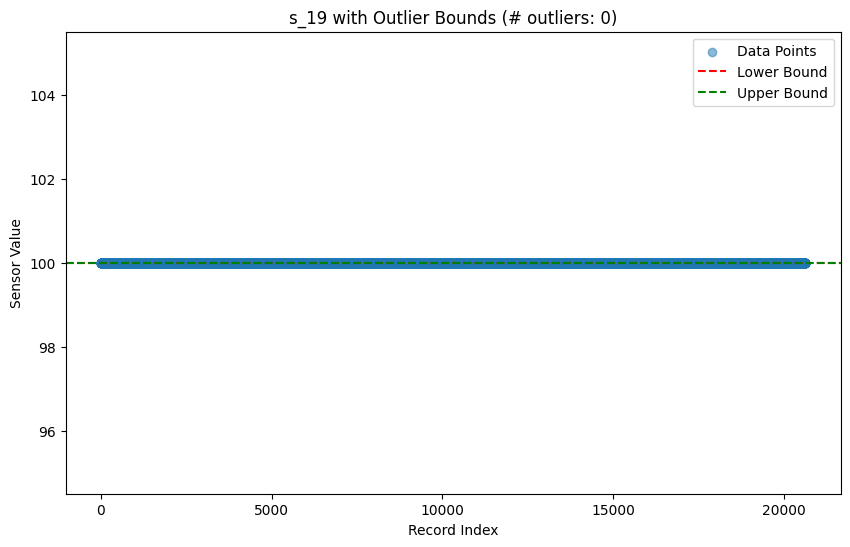

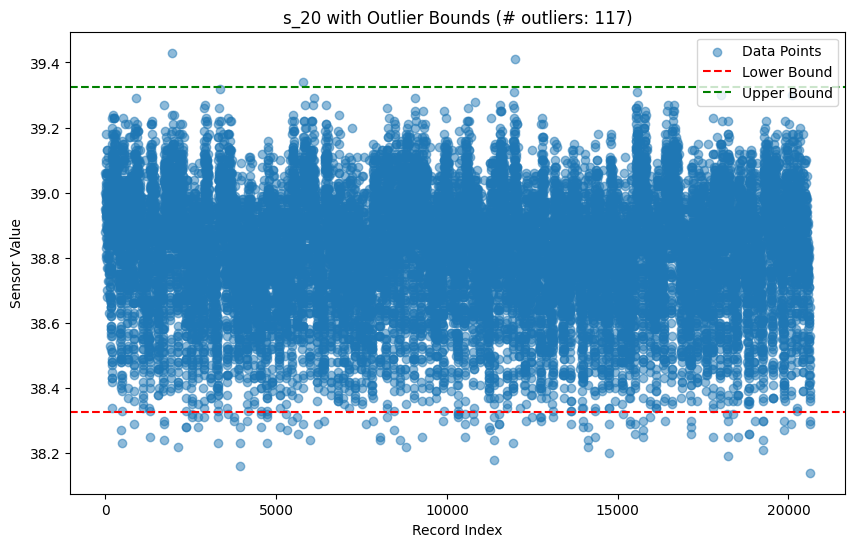

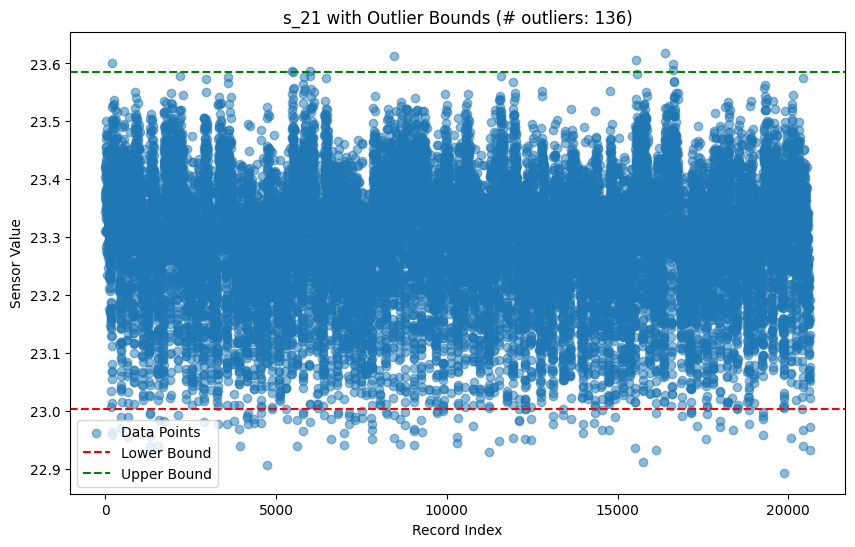

In [69]:
import matplotlib.pyplot as plt

for sensor in sensor_names:
    Q1 = df[sensor].quantile(0.25)
    Q3 = df[sensor].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = len(df[(df[sensor] < lower_bound) | (df[sensor] > upper_bound)])

    plt.figure(figsize=(10, 6))
    plt.scatter(df.index, df[sensor], alpha=0.5, label='Data Points')
    plt.axhline(y=lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axhline(y=upper_bound, color='green', linestyle='--', label='Upper Bound')

    plt.title(f'{sensor} with Outlier Bounds (# outliers: {outliers_count})')
    plt.xlabel("Record Index")
    plt.ylabel("Sensor Value")
    plt.legend()
    plt.show()


In [70]:

# Check for duplicate entries
print("\nDuplicate Entries:")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Duplicate Entries:
Number of duplicate rows: 0


In [71]:

# Check feature scaling status
print("\nFeature Scaling Status:")
for sensor in sensor_names:
    mean = df[sensor].mean()
    std = df[sensor].std()
    if abs(mean) > 1 or std > 1:
        print(f"{sensor} needs scaling (mean: {mean:.2f}, std: {std:.2f})")



# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[sensor_names + setting_names])
df_scaled = df.copy()
df_scaled[sensor_names + setting_names] = scaled_features




Feature Scaling Status:
s_1 needs scaling (mean: 518.67, std: 0.00)
s_2 needs scaling (mean: 642.68, std: 0.50)
s_3 needs scaling (mean: 1590.52, std: 6.13)
s_4 needs scaling (mean: 1408.93, std: 9.00)
s_5 needs scaling (mean: 14.62, std: 0.00)
s_6 needs scaling (mean: 21.61, std: 0.00)
s_7 needs scaling (mean: 553.37, std: 0.89)
s_8 needs scaling (mean: 2388.10, std: 0.07)
s_9 needs scaling (mean: 9065.24, std: 22.08)
s_10 needs scaling (mean: 1.30, std: 0.00)
s_11 needs scaling (mean: 47.54, std: 0.27)
s_12 needs scaling (mean: 521.41, std: 0.74)
s_13 needs scaling (mean: 2388.10, std: 0.07)
s_14 needs scaling (mean: 8143.75, std: 19.08)
s_15 needs scaling (mean: 8.44, std: 0.04)
s_17 needs scaling (mean: 393.21, std: 1.55)
s_18 needs scaling (mean: 2388.00, std: 0.00)
s_19 needs scaling (mean: 100.00, std: 0.00)
s_20 needs scaling (mean: 38.82, std: 0.18)
s_21 needs scaling (mean: 23.29, std: 0.11)


In [72]:

# Feature Engineering
def create_rolling_features(df, window_size=5):
    features = []
    for sensor in sensor_names:
        # Rolling mean
        df[f'{sensor}_rolling_mean'] = df.groupby('unit_number')[sensor].transform(lambda x: x.rolling(window=window_size).mean())
        # Rolling std
        df[f'{sensor}_rolling_std'] = df.groupby('unit_number')[sensor].transform(lambda x: x.rolling(window=window_size).std())
        # Rolling min
        df[f'{sensor}_rolling_min'] = df.groupby('unit_number')[sensor].transform(lambda x: x.rolling(window=window_size).min())
        # Rolling max
        df[f'{sensor}_rolling_max'] = df.groupby('unit_number')[sensor].transform(lambda x: x.rolling(window=window_size).max())
        features.extend([f'{sensor}_rolling_mean', f'{sensor}_rolling_std',
                        f'{sensor}_rolling_min', f'{sensor}_rolling_max'])
    return df, features

# Apply rolling features
df_engineered, new_features = create_rolling_features(df_scaled)

# Calculate degradation rates
for sensor in sensor_names:
    df_engineered[f'{sensor}_degradation_rate'] = df_engineered.groupby('unit_number')[sensor].diff()

# Time-based features
df_engineered['time_since_start'] = df_engineered.groupby('unit_number')['time_cycles'].transform('min')
df_engineered['time_to_failure'] = df_engineered.groupby('unit_number')['time_cycles'].transform('max') - df_engineered['time_cycles']

# Handle missing values in new features
df_engineered = df_engineered.fillna(method='ffill').fillna(method='bfill')


/var/folders/xx/3zg52x4x11x2s5r0cjy5yry40000gn/T/ipykernel_29844/3275674149.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{sensor}_rolling_min'] = df.groupby('unit_number')[sensor].transform(lambda x: x.rolling(window=window_size).min())
/var/folders/xx/3zg52x4x11x2s5r0cjy5yry40000gn/T/ipykernel_29844/3275674149.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{sensor}_rolling_max'] = df.groupby('unit_number')[sensor].transform(lambda x: x.rolling(window=window_size).max())
/var/folders/xx/3zg52x4x11x2s5r0cj

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import os

# Define column names
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

# Convert TXT to CSV with enforced data types
def convert_txt_to_csv(txt_file, csv_file):
    if not os.path.exists(csv_file):
        print(f"Converting {txt_file} → {csv_file}")
        df = pd.read_csv(txt_file, sep='\s+', header=None, names=col_names)
        for col in col_names[1:]:  # all except unit_number
            df[col] = pd.to_numeric(df[col], errors='coerce')
        df.dropna(inplace=True)
        df.to_csv(csv_file, index=False, header=False)  # 🚨 don't write header
    else:
        print(f"{csv_file} already exists")


# Convert all datasets
convert_txt_to_csv('train_FD001.txt', 'train_FD001.csv')
convert_txt_to_csv('train_FD002.txt', 'train_FD002.csv')
convert_txt_to_csv('train_FD003.txt', 'train_FD003.csv')
convert_txt_to_csv('train_FD004.txt', 'train_FD004.csv')

# Read CSVs with column names defined earlier
train_1 = pd.read_csv('train_FD001.csv', header=None, names=col_names) # Read with header=None and names=col_names
train_2 = pd.read_csv('train_FD002.csv', header=None, names=col_names)
train_3 = pd.read_csv('train_FD003.csv', header=None, names=col_names)
train_4 = pd.read_csv('train_FD004.csv', header=None, names=col_names)

# ✅ Enforce numeric types again after loading (in case any column is read as object)
for col in col_names[1:]:  # skip 'unit_number'
    train_1[col] = pd.to_numeric(train_1[col], errors='coerce')
    train_2[col] = pd.to_numeric(train_2[col], errors='coerce')
    train_3[col] = pd.to_numeric(train_3[col], errors='coerce')
    train_4[col] = pd.to_numeric(train_4[col], errors='coerce')

# RUL of each sensor
grouped_data_1 = train_1.groupby('unit_number')
grouped_data_2 = train_2.groupby('unit_number')
grouped_data_3 = train_3.groupby('unit_number')
grouped_data_4 = train_4.groupby('unit_number')

# Now this will work without errors
time_cycles_average = train_1[index_names].groupby('unit_number').mean()
max_time_cycles = train_1[index_names].groupby('unit_number').max()['time_cycles']

# Calculate RUL
merged = train_1.merge(max_time_cycles.to_frame(name='max_time_cycle'), left_on='unit_number', right_index=True)
merged["RUL"] = merged["max_time_cycle"] - merged['time_cycles']
merged = merged.drop("max_time_cycle", axis=1)

df = merged

print(df.shape)

train_FD001.csv already exists
train_FD002.csv already exists
train_FD003.csv already exists
train_FD004.csv already exists
(20631, 27)


In [74]:
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tabulate import tabulate
import os

index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i+1) for i in range(21)]
col_names = index_names + setting_names + sensor_names

train_files = ['train_FD001.csv', 'train_FD002.csv', 'train_FD003.csv', 'train_FD004.csv']
test_files = ['test_FD001.csv', 'test_FD002.csv', 'test_FD003.csv', 'test_FD004.csv']
rul_files = ['RUL_FD001.txt', 'RUL_FD002.txt', 'RUL_FD003.txt', 'RUL_FD004.txt'] # Changed to .txt

# Add this function from previous cell for test set conversion
def convert_txt_to_csv(txt_file, csv_file):
    if not os.path.exists(csv_file):
        print(f"Converting {txt_file} → {csv_file}")
        df = pd.read_csv(txt_file, sep='\s+', header=None, names=col_names)
        for col in col_names[1:]:  # all except unit_number
            df[col] = pd.to_numeric(df[col], errors='coerce')
        df.dropna(inplace=True)
        df.to_csv(csv_file, index=False, header=False)  # 🚨 don't write header
    else:
        print(f"{csv_file} already exists")

# Ensure test input files exist and are readable
convert_txt_to_csv('test_FD001.txt', 'test_FD001.csv')
convert_txt_to_csv('test_FD002.txt', 'test_FD002.csv')
convert_txt_to_csv('test_FD003.txt', 'test_FD003.csv')
convert_txt_to_csv('test_FD004.txt', 'test_FD004.csv')

train_list = []
for f in train_files:
    df = pd.read_csv(f, header=None, names=col_names)
    df['max_cycle'] = df.groupby('unit_number')['time_cycles'].transform('max')
    df['RUL'] = df['max_cycle'] - df['time_cycles']
    train_list.append(df)
train_data = pd.concat(train_list, ignore_index=True)

test_list = []
rul = []
for tf, rf in zip(test_files, rul_files):
    df_test = pd.read_csv(tf, header=None, names=col_names)
    df_test_last = df_test.groupby('unit_number').tail(1).reset_index(drop=True)
    test_list.append(df_test_last)

    df_rul = pd.read_csv(rf, header=None) # Reads the .txt files now

    values = df_rul.iloc[:, 0].tolist()

    if isinstance(values[0], str) and values[0].strip().lower() == 'rul':
        values = values[1:]

    n_engines = df_test['unit_number'].nunique()
    if len(values) < n_engines:
        print(f"Warning: For file {rf}, expected {n_engines} values but got {len(values)}. Padding with 0.")
        pad_count = n_engines - len(values)
        values += [0] * pad_count
    elif len(values) > n_engines:
        values = values[:n_engines]
    rul.extend(list(map(int, values)))

test_data = pd.concat(test_list, ignore_index=True)
test_data['true_RUL'] = rul

# Naive Forecast: uses the global max cycle from training data.
rul_cap = train_data.groupby('unit_number')['time_cycles'].max().max()
test_data['pred_naive'] = np.maximum(rul_cap - test_data['time_cycles'], 0)

# Moving Average Forecast: uses average of max cycles from each engine.
avg_max_cycle = train_data.groupby('unit_number')['time_cycles'].max().mean()
test_data['pred_mavg'] = np.maximum(avg_max_cycle - test_data['time_cycles'], 0)

# Linear Regression
X_train = train_data[['time_cycles']]
y_train = train_data['RUL']
lr = LinearRegression()
lr.fit(X_train, y_train)
X_test = test_data[['time_cycles']]
test_data['pred_lr'] = lr.predict(X_test)

models = ['pred_lr', 'pred_naive', 'pred_mavg']

# Evaluation.
for m in models:
    mse = mean_squared_error(test_data['true_RUL'], test_data[m])
    rmse = sqrt(mse)
    mae = mean_absolute_error(test_data['true_RUL'], test_data[m])
    r2 = r2_score(test_data['true_RUL'], test_data[m])

    data = [
        ["MSE", mse],
        ["RMSE", rmse],
        ["MAE", mae],
        ["R2", r2]
    ]

    print(f"\nEvaluation Metrics for Model: {m}")
    print(tabulate(data, headers=["Metric", "Value"], tablefmt="grid"))

test_FD001.csv already exists
test_FD002.csv already exists
test_FD003.csv already exists
test_FD004.csv already exists

Evaluation Metrics for Model: pred_lr
+----------+-------------+
| Metric   |       Value |
+==========+=============+
| MSE      | 3099.71     |
+----------+-------------+
| RMSE     |   55.6751   |
+----------+-------------+
| MAE      |   45.8632   |
+----------+-------------+
| R2       |   -0.188364 |
+----------+-------------+

Evaluation Metrics for Model: pred_naive
+----------+-------------+
| Metric   |       Value |
+==========+=============+
| MSE      | 102926      |
+----------+-------------+
| RMSE     |    320.821  |
+----------+-------------+
| MAE      |    313.225  |
+----------+-------------+
| R2       |    -38.4597 |
+----------+-------------+

Evaluation Metrics for Model: pred_mavg
+----------+-----------+
| Metric   |     Value |
+==========+===========+
| MSE      | 5768.96   |
+----------+-----------+
| RMSE     |   75.9537 |
+----------+--

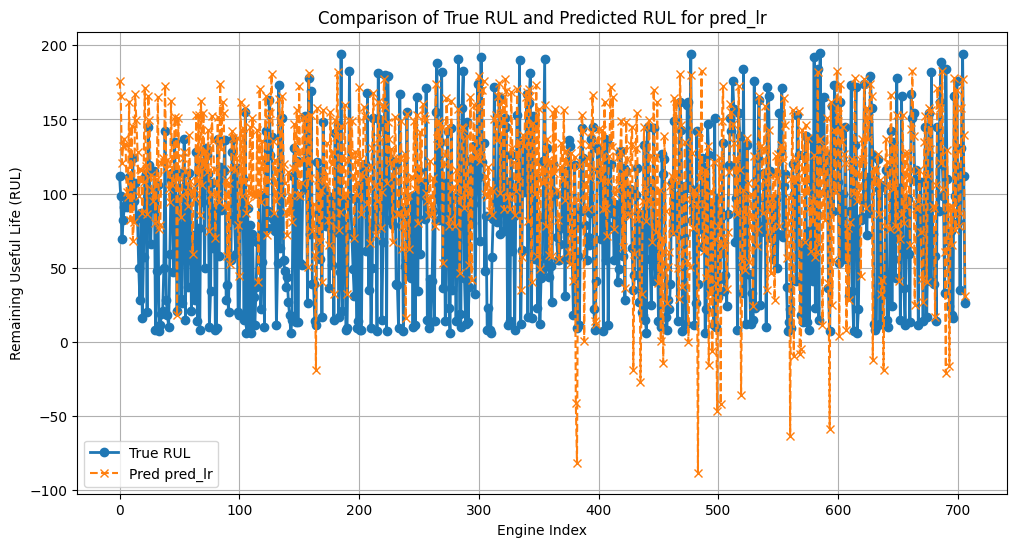

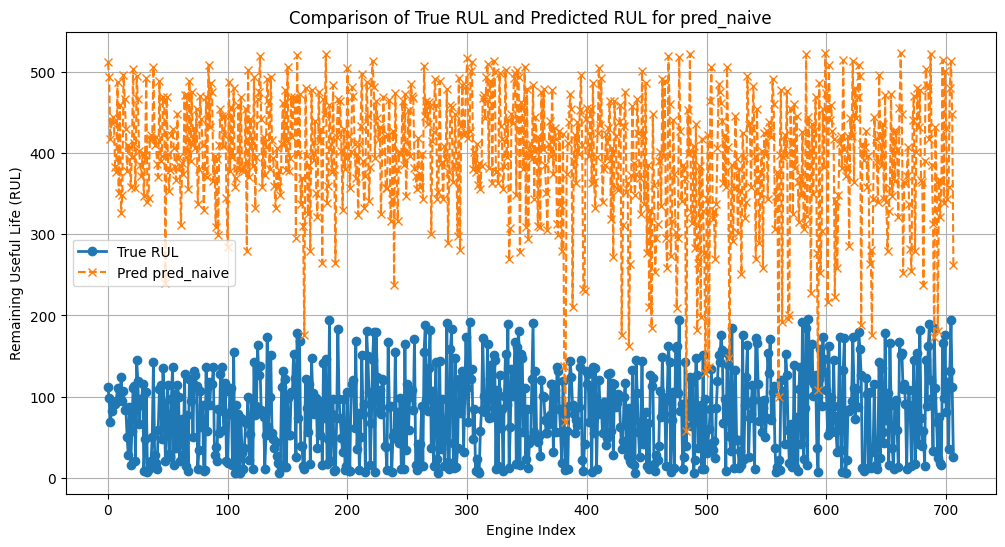

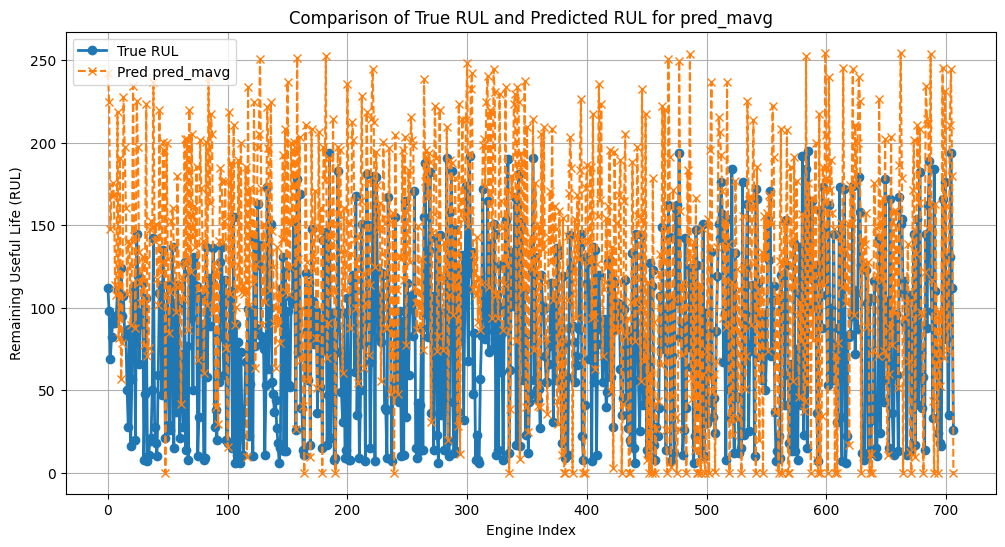

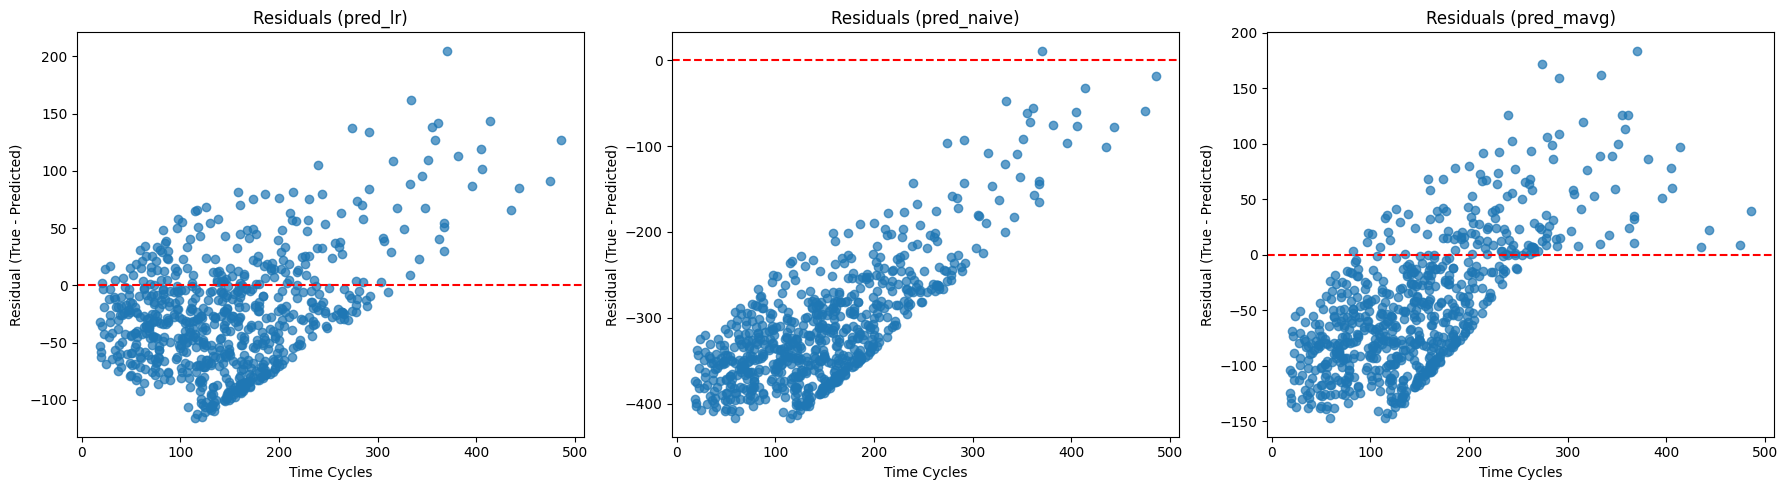

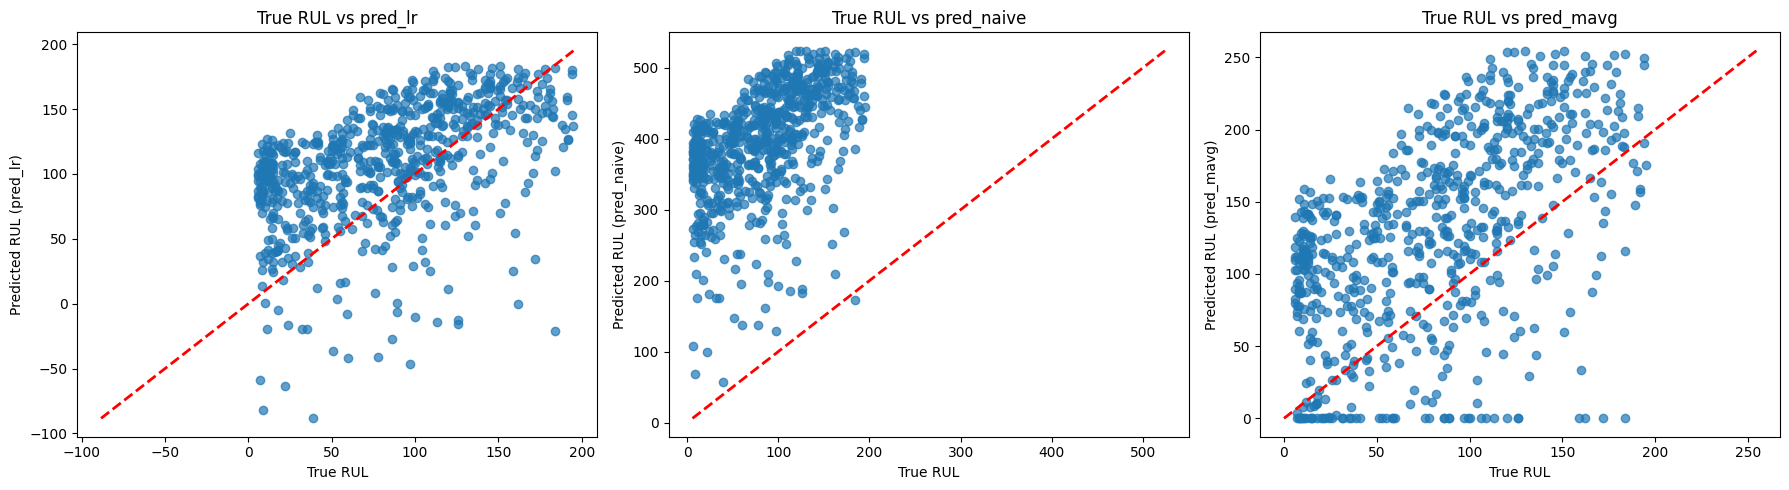

In [75]:
models = ['pred_lr', 'pred_naive', 'pred_mavg']

for m in models:
    plt.figure(figsize=(12, 6))
    plt.plot(test_data.index, test_data['true_RUL'], label='True RUL', linewidth=2, marker='o')
    plt.plot(test_data.index, test_data[m], label=f'Pred {m}', linestyle='--', marker='x')
    plt.xlabel('Engine Index')
    plt.ylabel('Remaining Useful Life (RUL)')
    plt.title(f'Comparison of True RUL and Predicted RUL for {m}')
    plt.legend()
    plt.grid(True)
    plt.show()
# 2. Residual Plots for Each Model
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, model in zip(axes, models):
    residuals = test_data['true_RUL'] - test_data[model]
    ax.scatter(test_data['time_cycles'], residuals, alpha=0.7)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_title(f"Residuals ({model})")
    ax.set_xlabel('Time Cycles')
    ax.set_ylabel('Residual (True - Predicted)')
plt.tight_layout()
plt.show()

# 3. Scatter Plots: Predicted RUL vs. True RUL with Identity Line
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, model in zip(axes, models):
    ax.scatter(test_data['true_RUL'], test_data[model], alpha=0.7)
    min_val = min(test_data['true_RUL'].min(), test_data[model].min())
    max_val = max(test_data['true_RUL'].max(), test_data[model].max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    ax.set_title(f"True RUL vs {model}")
    ax.set_xlabel("True RUL")
    ax.set_ylabel(f"Predicted RUL ({model})")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

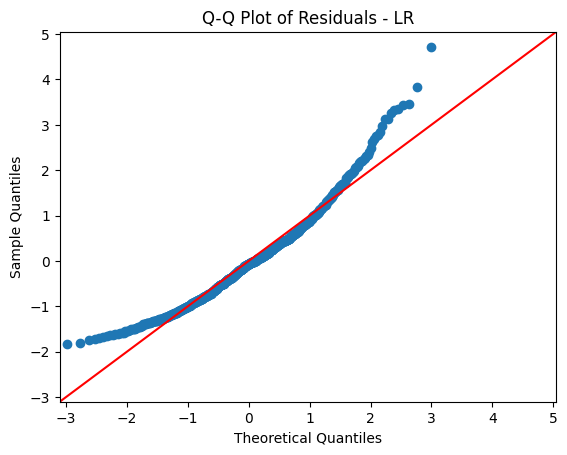

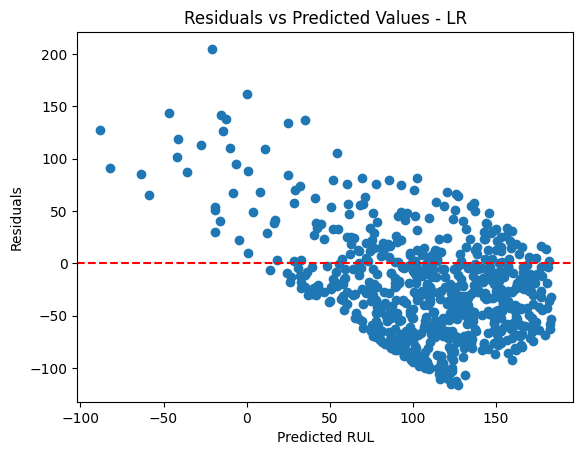

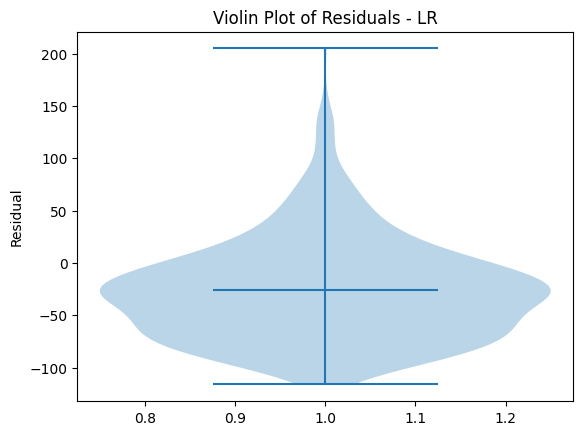

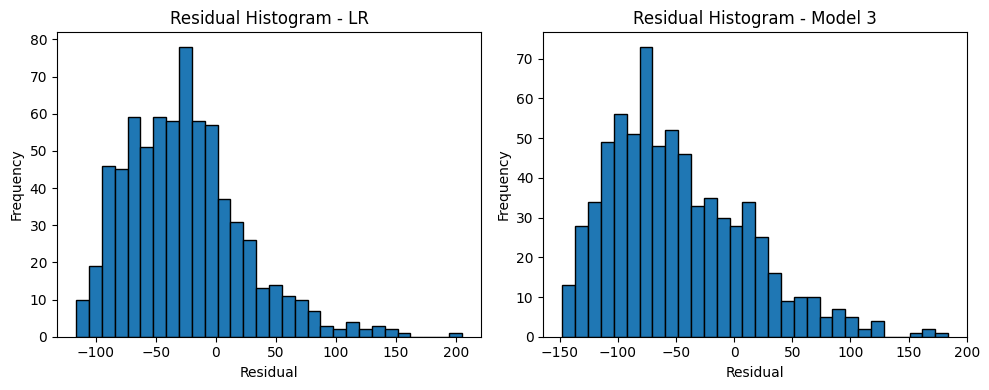

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm


residuals_lr = test_data['true_RUL'] - test_data['pred_lr']
plt.figure()
sm.qqplot(residuals_lr, line='45', fit=True)
plt.title("Q-Q Plot of Residuals - LR")
plt.show()

residuals_lr = test_data['true_RUL'] - test_data['pred_lr']
plt.figure()
plt.scatter(test_data['pred_lr'], residuals_lr)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values - LR")
plt.xlabel("Predicted RUL")
plt.ylabel("Residuals")
plt.show()

residuals_lr = test_data['true_RUL'] - test_data['pred_lr']
plt.figure()
plt.violinplot(residuals_lr, showmeans=True)
plt.title("Violin Plot of Residuals - LR")
plt.ylabel("Residual")
plt.show()

residuals_lr = test_data['true_RUL'] - test_data['pred_lr']
residuals_mavg = test_data['true_RUL'] - test_data['pred_mavg']
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(residuals_lr, bins=30, edgecolor='black')
plt.title("Residual Histogram - LR")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.subplot(1,2,2)
plt.hist(residuals_mavg, bins=30, edgecolor='black')
plt.title("Residual Histogram - Model 3")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()




In [77]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# Dataset wrapper for time-series data
class TimeSeriesDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return torch.tensor(self.sequences[idx], dtype=torch.float32), torch.tensor(self.labels[idx], dtype=torch.float32)

In [78]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # last time step output
        out = self.fc(out)
        return out.squeeze()

In [79]:
def walk_forward_validation(model_class, train_data, train_labels, val_data, val_labels, input_dim, **kwargs):
    model = model_class(input_dim=input_dim, **kwargs)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    dataset = TimeSeriesDataset(train_data, train_labels)
    loader = DataLoader(dataset, batch_size=64, shuffle=True)

    model.train()
    for epoch in range(10):  # You can tune this
        for X_batch, y_batch in loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        X_val = torch.tensor(val_data, dtype=torch.float32)
        y_val = torch.tensor(val_labels, dtype=torch.float32)
        predictions = model(X_val).numpy()
        y_val = y_val.numpy()

    rmse = math.sqrt(mean_squared_error(y_val, predictions))
    mae = mean_absolute_error(y_val, predictions)
    r2 = r2_score(y_val, predictions)
    return {"RMSE": rmse, "MAE": mae, "R2": r2}

In [80]:
# Generate sequences from df_engineered
def generate_sequences(df, features, window_size=30):
    sequences = []
    labels = []
    grouped = df.groupby('unit_number')

    for _, group in grouped:
        data = group[features].values
        rul_values = group['RUL'].values

        for i in range(len(group) - window_size + 1):
            seq = data[i:i + window_size]
            label = rul_values[i + window_size - 1]
            sequences.append(seq)
            labels.append(label)

    return np.array(sequences), np.array(labels)

# Features to use
features_for_model = sensor_names + setting_names + new_features + ['time_since_start', 'time_to_failure']

# Create LSTM-compatible sequences
X_seq, y_seq = generate_sequences(df_engineered, features=features_for_model, window_size=30)

print("Shape of input sequences:", X_seq.shape)
print("Shape of RUL labels:", y_seq.shape)

Shape of input sequences: (17731, 30, 110)
Shape of RUL labels: (17731,)


In [81]:
from sklearn.model_selection import train_test_split

# Split into training and validation
train_X, val_X, train_y, val_y = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

print("Train set shape:", train_X.shape)
print("Validation set shape:", val_X.shape)

Train set shape: (14184, 30, 110)
Validation set shape: (3547, 30, 110)


In [82]:
# Assuming train_X, train_y, val_X, val_y are already defined
input_dim = train_X.shape[2]  # number of features per timestep

results = walk_forward_validation(
    LSTMModel,
    train_X, train_y,
    val_X, val_y,
    input_dim=input_dim,
    hidden_dim=64,
    num_layers=2,
    output_dim=1
)

print("Evaluation Metrics:", results)

Evaluation Metrics: {'RMSE': 39.88307954734297, 'MAE': 19.21941566467285, 'R2': 0.5842075347900391}


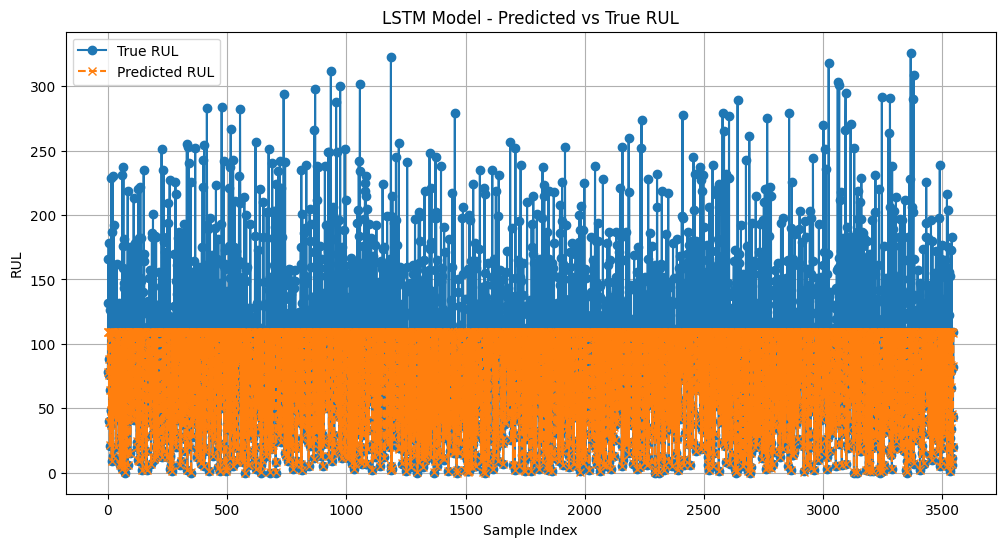

In [83]:
def predict_lstm(model, X_data):
    model.eval()
    with torch.no_grad():
        X_tensor = torch.tensor(X_data, dtype=torch.float32)
        predictions = model(X_tensor).numpy()
    return predictions

# Train the LSTM
lstm_model = LSTMModel(input_dim=train_X.shape[2], hidden_dim=64, num_layers=2, output_dim=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.001)

train_dataset = TimeSeriesDataset(train_X, train_y)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

for epoch in range(10):
    lstm_model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = lstm_model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()

# Predict and plot
val_preds_lstm = predict_lstm(lstm_model, val_X)

plt.figure(figsize=(12, 6))
plt.plot(val_y, label="True RUL", marker='o')
plt.plot(val_preds_lstm, label="Predicted RUL", linestyle='--', marker='x')
plt.title("LSTM Model - Predicted vs True RUL")
plt.xlabel("Sample Index")
plt.ylabel("RUL")
plt.legend()
plt.grid(True)
plt.show()

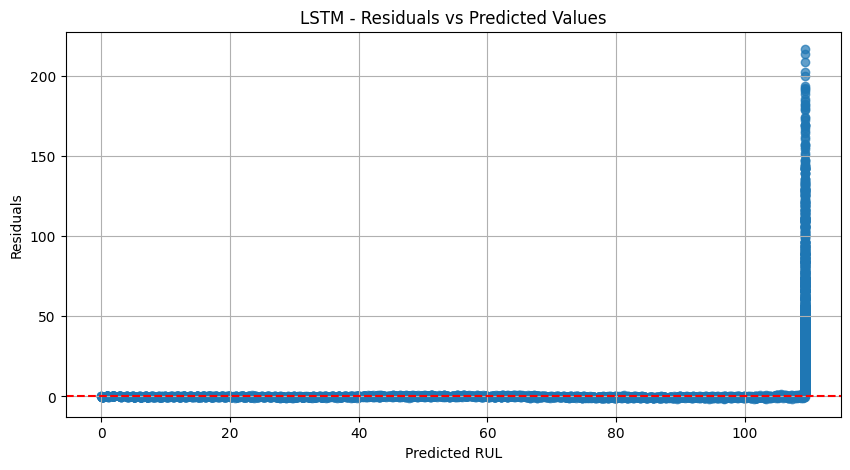

In [84]:
residuals_lstm = val_y - val_preds_lstm

plt.figure(figsize=(10, 5))
plt.scatter(val_preds_lstm, residuals_lstm, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("LSTM - Residuals vs Predicted Values")
plt.xlabel("Predicted RUL")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

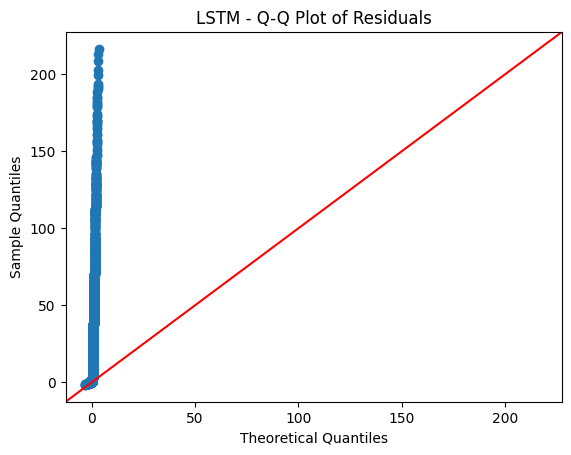

In [85]:
import statsmodels.api as sm
sm.qqplot(residuals_lstm, line='45')
plt.title("LSTM - Q-Q Plot of Residuals")
plt.show()

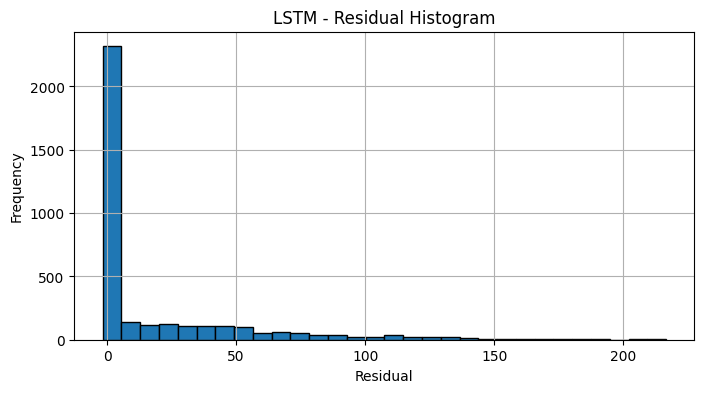

In [86]:
plt.figure(figsize=(8, 4))
plt.hist(residuals_lstm, bins=30, edgecolor='black')
plt.title("LSTM - Residual Histogram")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# Store evaluation metrics for each model
results_lstm = {
    "RMSE": math.sqrt(mean_squared_error(val_y, val_preds_lstm)),
    "MAE": mean_absolute_error(val_y, val_preds_lstm),
    "R2": r2_score(val_y, val_preds_lstm)
}

In [88]:
torch.save(lstm_model.state_dict(), "lstm_rul_model.pt")

# Recreate the model before loading
loaded_model = LSTMModel(input_dim=train_X.shape[2], hidden_dim=64, num_layers=2, output_dim=1)
loaded_model.load_state_dict(torch.load("lstm_rul_model.pt"))
loaded_model.eval()

LSTMModel(
  (lstm): LSTM(110, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [89]:
class BiLSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(BiLSTMModel, self).__init__()
        self.bilstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, x):
        out, _ = self.bilstm(x)
        out = out[:, -1, :]  # last time step
        out = self.fc(out)
        return out.squeeze()

In [90]:
# Instantiate and train BiLSTM
bilstm_model = BiLSTMModel(input_dim=train_X.shape[2], hidden_dim=64, num_layers=2, output_dim=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(bilstm_model.parameters(), lr=0.001)

train_dataset = TimeSeriesDataset(train_X, train_y)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

for epoch in range(10):
    bilstm_model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = bilstm_model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()

# Predict and evaluate
val_preds_bilstm = predict_lstm(bilstm_model, val_X)

rmse = math.sqrt(mean_squared_error(val_y, val_preds_bilstm))
mae = mean_absolute_error(val_y, val_preds_bilstm)
r2 = r2_score(val_y, val_preds_bilstm)

print("\n BiLSTM Results:")
print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")


 BiLSTM Results:
RMSE: 23.3880, MAE: 7.8401, R2: 0.8570


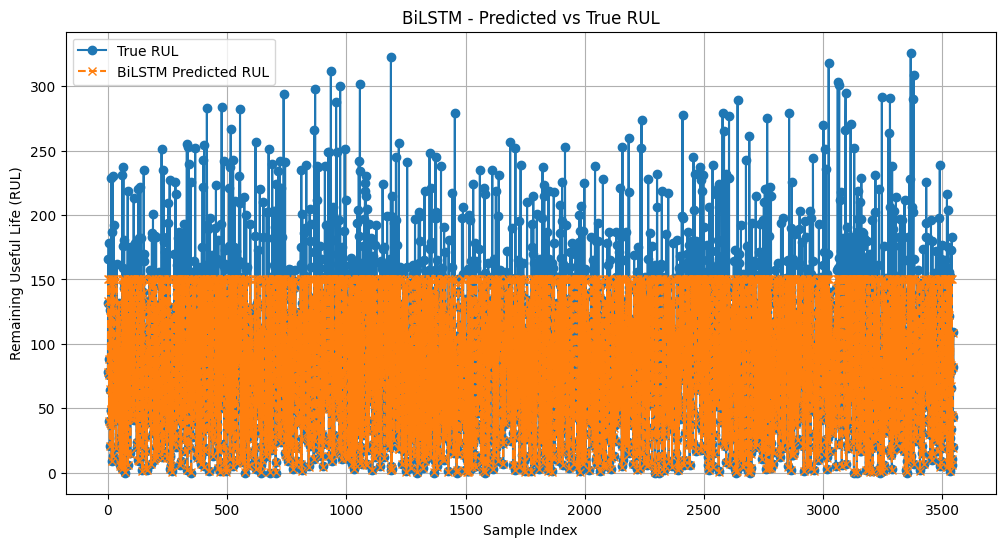

In [91]:
plt.figure(figsize=(12, 6))
plt.plot(val_y, label="True RUL", marker='o')
plt.plot(val_preds_bilstm, label="BiLSTM Predicted RUL", linestyle='--', marker='x')
plt.title("BiLSTM - Predicted vs True RUL")
plt.xlabel("Sample Index")
plt.ylabel("Remaining Useful Life (RUL)")
plt.legend()
plt.grid(True)
plt.show()

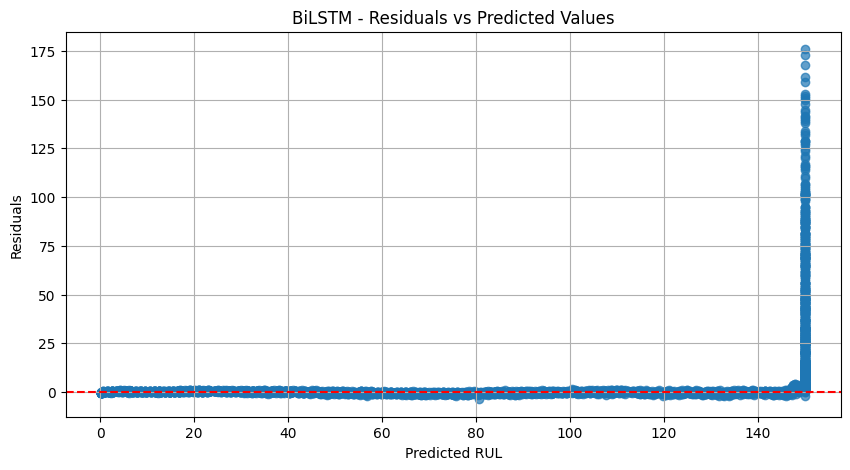

In [92]:
residuals_bilstm = val_y - val_preds_bilstm
plt.figure(figsize=(10, 5))
plt.scatter(val_preds_bilstm, residuals_bilstm, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("BiLSTM - Residuals vs Predicted Values")
plt.xlabel("Predicted RUL")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

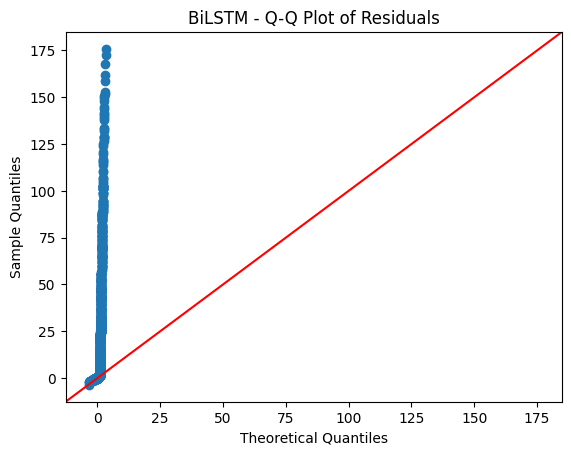

In [93]:
import statsmodels.api as sm
sm.qqplot(residuals_bilstm, line='45')
plt.title("BiLSTM - Q-Q Plot of Residuals")
plt.show()

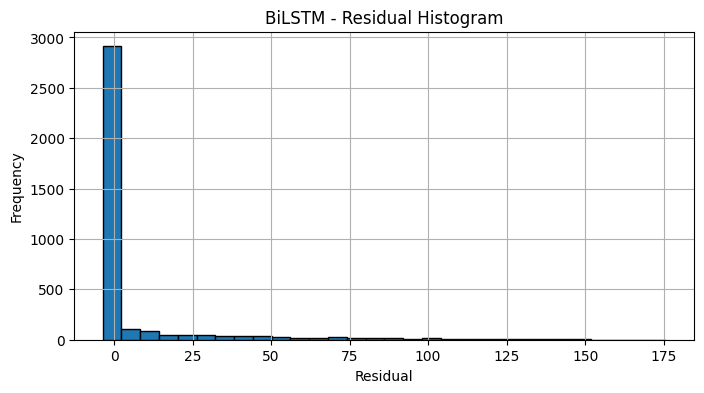

In [94]:
plt.figure(figsize=(8, 4))
plt.hist(residuals_bilstm, bins=30, edgecolor='black')
plt.title("BiLSTM - Residual Histogram")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [95]:
results_bilstm = {
    "RMSE": math.sqrt(mean_squared_error(val_y, val_preds_bilstm)),
    "MAE": mean_absolute_error(val_y, val_preds_bilstm),
    "R2": r2_score(val_y, val_preds_bilstm)
}

In [96]:
# Save
torch.save(bilstm_model.state_dict(), "bilstm_rul_model.pt")

# Load later
loaded_bilstm = BiLSTMModel(input_dim=train_X.shape[2], hidden_dim=64, num_layers=2, output_dim=1)
loaded_bilstm.load_state_dict(torch.load("bilstm_rul_model.pt"))
loaded_bilstm.eval()

BiLSTMModel(
  (bilstm): LSTM(110, 64, num_layers=2, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=128, out_features=1, bias=True)
)

In [97]:
class CNNLSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(CNNLSTMModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=input_dim, out_channels=32, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.lstm = nn.LSTM(input_size=32, hidden_size=hidden_dim, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Input: (batch_size, sequence_length, input_dim)
        x = x.permute(0, 2, 1)  # to (batch_size, input_dim, sequence_length) for CNN
        x = self.relu(self.conv1(x))
        x = x.permute(0, 2, 1)  # back to (batch_size, sequence_length, feature_dim) for LSTM
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out.squeeze()


In [98]:
cnnlstm_model = CNNLSTMModel(input_dim=train_X.shape[2], hidden_dim=64, num_layers=2, output_dim=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(cnnlstm_model.parameters(), lr=0.001)

train_loader = DataLoader(TimeSeriesDataset(train_X, train_y), batch_size=64, shuffle=True)

for epoch in range(10):
    cnnlstm_model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = cnnlstm_model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()

val_preds_cnnlstm = predict_lstm(cnnlstm_model, val_X)

rmse = math.sqrt(mean_squared_error(val_y, val_preds_cnnlstm))
mae = mean_absolute_error(val_y, val_preds_cnnlstm)
r2 = r2_score(val_y, val_preds_cnnlstm)

print("\n CNN-LSTM Results:")
print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")


 CNN-LSTM Results:
RMSE: 39.6519, MAE: 18.9310, R2: 0.5890


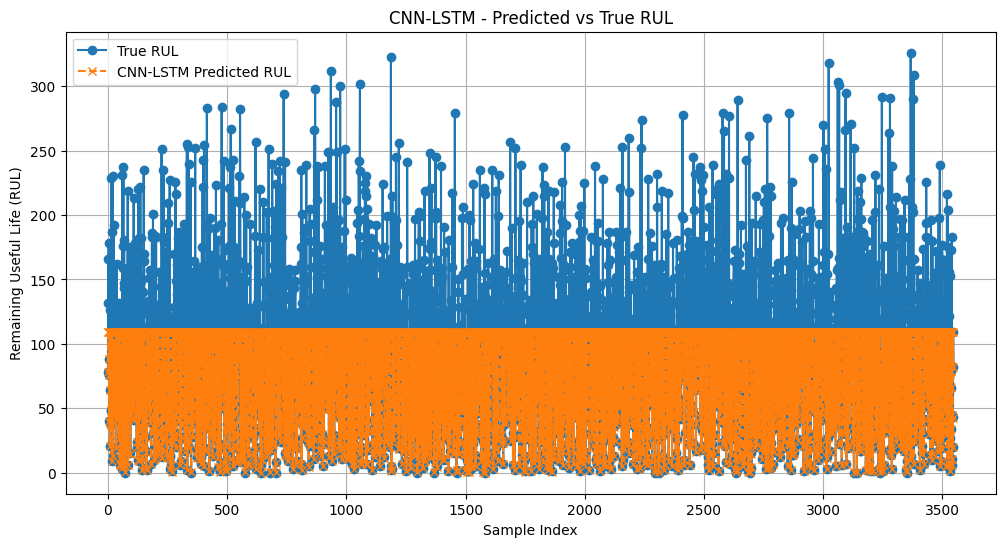

In [99]:
plt.figure(figsize=(12, 6))
plt.plot(val_y, label="True RUL", marker='o')
plt.plot(val_preds_cnnlstm, label="CNN-LSTM Predicted RUL", linestyle='--', marker='x')
plt.title("CNN-LSTM - Predicted vs True RUL")
plt.xlabel("Sample Index")
plt.ylabel("Remaining Useful Life (RUL)")
plt.legend()
plt.grid(True)
plt.show()


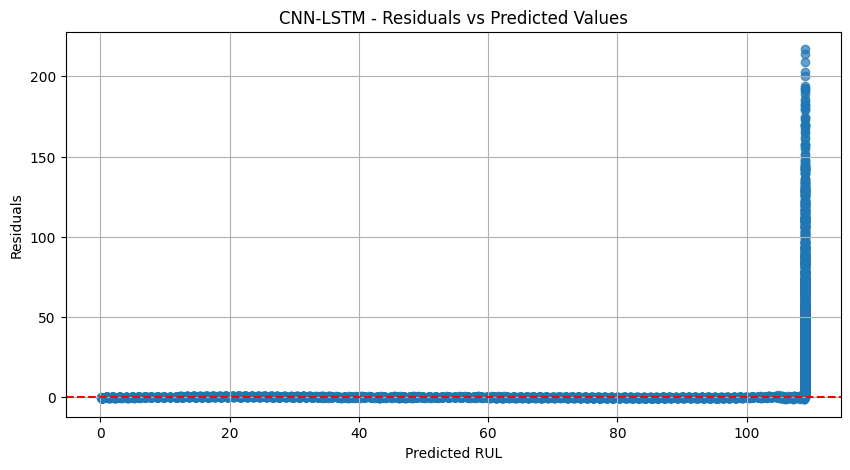

In [100]:
residuals_cnnlstm = val_y - val_preds_cnnlstm

plt.figure(figsize=(10, 5))
plt.scatter(val_preds_cnnlstm, residuals_cnnlstm, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("CNN-LSTM - Residuals vs Predicted Values")
plt.xlabel("Predicted RUL")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

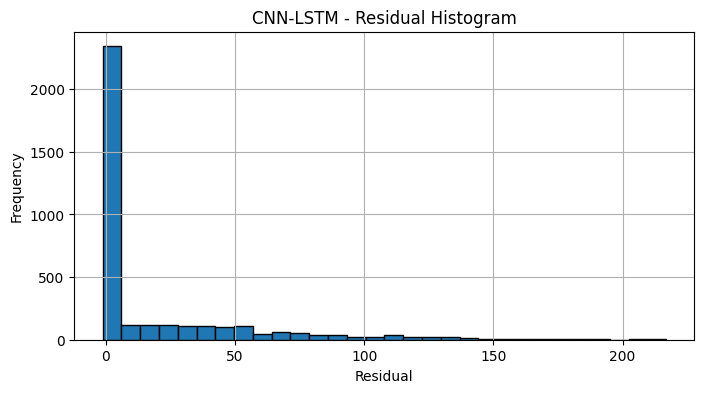

In [101]:
plt.figure(figsize=(8, 4))
plt.hist(residuals_cnnlstm, bins=30, edgecolor='black')
plt.title("CNN-LSTM - Residual Histogram")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [102]:
results_cnnlstm = {
    "RMSE": math.sqrt(mean_squared_error(val_y, val_preds_cnnlstm)),
    "MAE": mean_absolute_error(val_y, val_preds_cnnlstm),
    "R2": r2_score(val_y, val_preds_cnnlstm)
}

In [103]:
# Save
torch.save(cnnlstm_model.state_dict(), "cnnlstm_rul_model.pt")

# Load later
loaded_cnnlstm = CNNLSTMModel(input_dim=train_X.shape[2], hidden_dim=64, num_layers=2, output_dim=1)
loaded_cnnlstm.load_state_dict(torch.load("cnnlstm_rul_model.pt"))
loaded_cnnlstm.eval()

CNNLSTMModel(
  (conv1): Conv1d(110, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (relu): ReLU()
  (lstm): LSTM(32, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [104]:
class TransformerRULModel(nn.Module):
    def __init__(self, input_dim, model_dim=64, num_heads=4, num_layers=2, dropout=0.1):
        super(TransformerRULModel, self).__init__()

        self.input_proj = nn.Linear(input_dim, model_dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=model_dim, nhead=num_heads, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.output_layer = nn.Linear(model_dim, 1)

    def forward(self, x):
        # x shape: (batch_size, sequence_length, input_dim)
        x = self.input_proj(x)  # → (batch, seq_len, model_dim)
        x = x.permute(1, 0, 2)  # Transformer expects: (seq_len, batch, model_dim)
        x = self.transformer_encoder(x)
        x = x.permute(1, 2, 0)  # → (batch, model_dim, seq_len)
        x = self.global_avg_pool(x).squeeze(2)  # → (batch, model_dim)
        return self.output_layer(x).squeeze()   # → (batch,)

In [105]:
transformer_model = TransformerRULModel(input_dim=train_X.shape[2])
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(transformer_model.parameters(), lr=0.001)

train_loader = DataLoader(TimeSeriesDataset(train_X, train_y), batch_size=64, shuffle=True)

for epoch in range(10):
    transformer_model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = transformer_model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()

/opt/homebrew/Caskroom/miniconda/base/envs/pytorch_learn/lib/python3.11/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [106]:
val_preds_transformer = predict_lstm(transformer_model, val_X)

rmse = math.sqrt(mean_squared_error(val_y, val_preds_transformer))
mae = mean_absolute_error(val_y, val_preds_transformer)
r2 = r2_score(val_y, val_preds_transformer)

print("\nTransformer Model Results:")
print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")


Transformer Model Results:
RMSE: 8.4324, MAE: 4.4634, R2: 0.9814


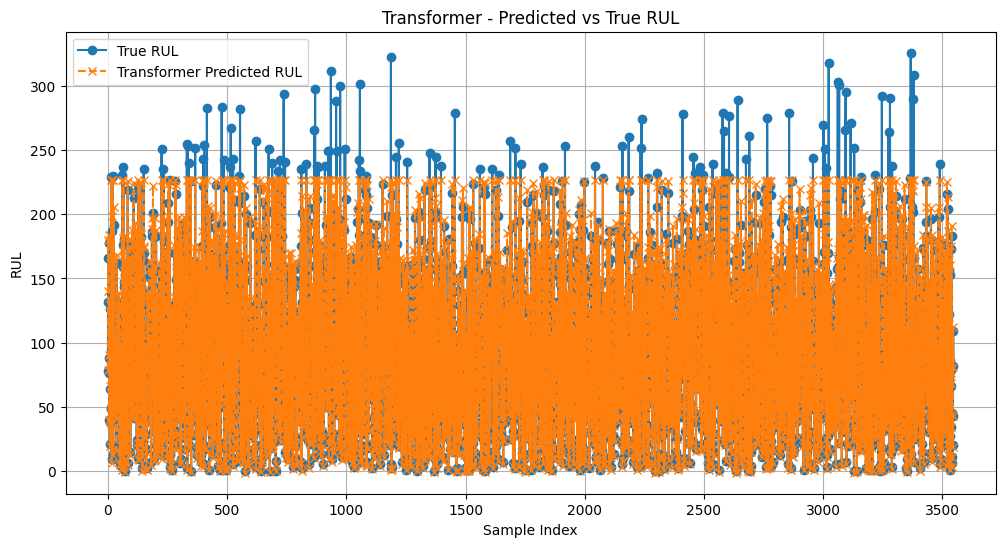

In [107]:
plt.figure(figsize=(12, 6))
plt.plot(val_y, label="True RUL", marker='o')
plt.plot(val_preds_transformer, label="Transformer Predicted RUL", linestyle='--', marker='x')
plt.title("Transformer - Predicted vs True RUL")
plt.xlabel("Sample Index")
plt.ylabel("RUL")
plt.legend()
plt.grid(True)
plt.show()

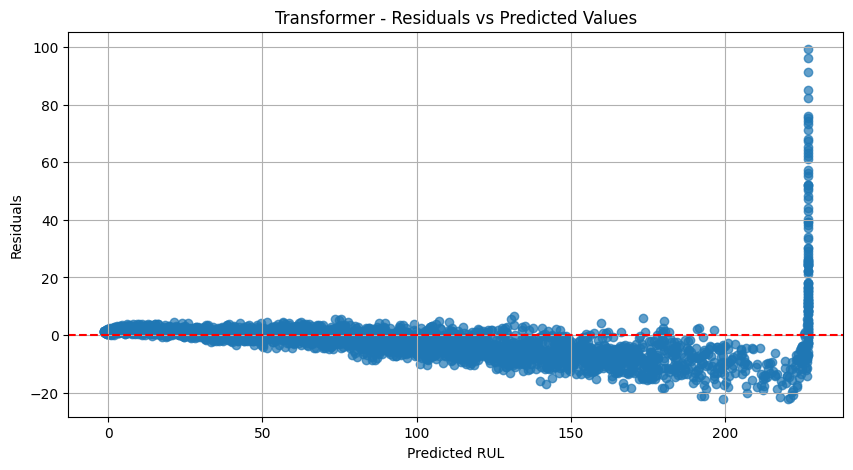

In [108]:
residuals_transformer = val_y - val_preds_transformer

plt.figure(figsize=(10, 5))
plt.scatter(val_preds_transformer, residuals_transformer, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("Transformer - Residuals vs Predicted Values")
plt.xlabel("Predicted RUL")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

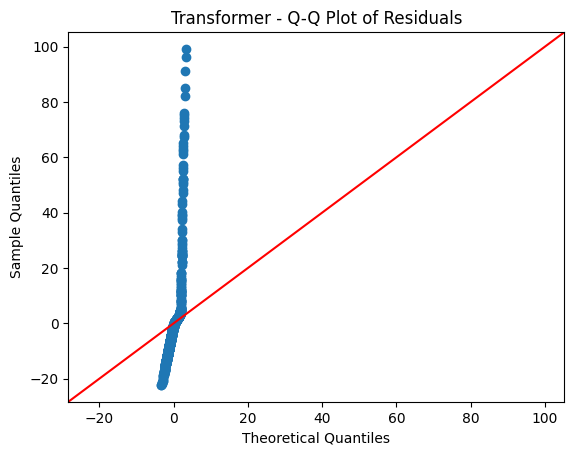

In [109]:
import statsmodels.api as sm
sm.qqplot(residuals_transformer, line='45')
plt.title("Transformer - Q-Q Plot of Residuals")
plt.show()

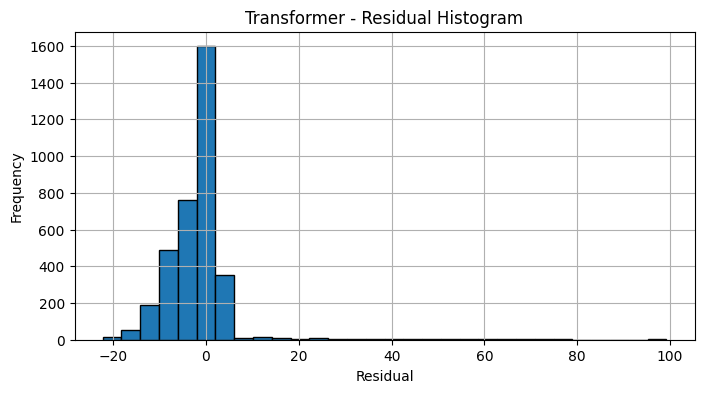

In [110]:
plt.figure(figsize=(8, 4))
plt.hist(residuals_transformer, bins=30, edgecolor='black')
plt.title("Transformer - Residual Histogram")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [111]:
results_transformer = {
    "RMSE": math.sqrt(mean_squared_error(val_y, val_preds_transformer)),
    "MAE": mean_absolute_error(val_y, val_preds_transformer),
    "R2": r2_score(val_y, val_preds_transformer)
}

In [112]:
# Save
torch.save(transformer_model.state_dict(), "transformer_rul_model.pt")

# Load later
loaded_transformer = TransformerRULModel(input_dim=train_X.shape[2])
loaded_transformer.load_state_dict(torch.load("transformer_rul_model.pt"))
loaded_transformer.eval()

/opt/homebrew/Caskroom/miniconda/base/envs/pytorch_learn/lib/python3.11/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


TransformerRULModel(
  (input_proj): Linear(in_features=110, out_features=64, bias=True)
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (global_avg_pool): AdaptiveAvgPool1d(output_size=1)
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
)

In [113]:
#Define the model (Multi-Head Attention LSTM)

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, MultiHeadAttention, LayerNormalization, Dropout, GlobalAveragePooling1D

def build_multihead_attention_lstm(input_shape, num_heads=4, dropout_rate=0.2):
    inputs = Input(shape=input_shape)
    lstm_out = LSTM(128, return_sequences=True)(inputs)

    attention_out = MultiHeadAttention(num_heads=num_heads, key_dim=64)(lstm_out, lstm_out)
    attention_out = Dropout(dropout_rate)(attention_out)
    attention_out = LayerNormalization()(attention_out + lstm_out)

    pooled = GlobalAveragePooling1D()(attention_out)
    dense1 = Dense(64, activation='relu')(pooled)
    dropout = Dropout(dropout_rate)(dense1)
    outputs = Dense(1)(dropout)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def reshape_data(df, seq_len):
    """
    Reshapes the input data for LSTM models.
    """
    num_samples = df.shape[0] - seq_len + 1
    data = []
    for i in range(num_samples):
        data.append(df[i:i+seq_len])  # Appending slices directly
    return np.array(data)

seq_len = 30
# Features to use
features_for_model = sensor_names + setting_names + new_features + ['time_since_start', 'time_to_failure']
# Assuming df_engineered contains your data
X_data = df_engineered[features_for_model].values  # Select the desired features
X_reshaped = reshape_data(X_data, seq_len)
y_data = df_engineered['RUL'].values[seq_len - 1:]  # Adjust labels to match reshaped data

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_reshaped, y_data, test_size=0.2, random_state=42)

# Build and compile the model
multi_att_lstm_model = build_multihead_attention_lstm(input_shape=(X_train.shape[1], X_train.shape[2]))

In [114]:
#instantiate and train

# Train the Multi-Head Attention LSTM model
history_multi_att_lstm = multi_att_lstm_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    verbose=1
)

Epoch 1/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - loss: 8508.5918 - mae: 65.7975 - val_loss: 101.4755 - val_mae: 4.3608
Epoch 2/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - loss: 260.2832 - mae: 10.3193 - val_loss: 88.7108 - val_mae: 7.9906
Epoch 3/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - loss: 188.5267 - mae: 9.4290 - val_loss: 10.1814 - val_mae: 2.0033
Epoch 4/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - loss: 183.1874 - mae: 9.4316 - val_loss: 39.7379 - val_mae: 5.2053
Epoch 5/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - loss: 169.6548 - mae: 9.0076 - val_loss: 19.3419 - val_mae: 3.4294
Epoch 6/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - loss: 179.7068 - mae: 9.3534 - val_loss: 12.8789 - val_mae: 2.4541
Epoch 7/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - loss: 175.8172 - mae: 9.2439 - val_loss: 86.4462 - val_mae: 8.0563
Epoch 8/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - loss: 167.5391 - mae: 9.0366 - val_loss: 122.6001 - val_mae: 8.3088
Epoch 9/50


129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


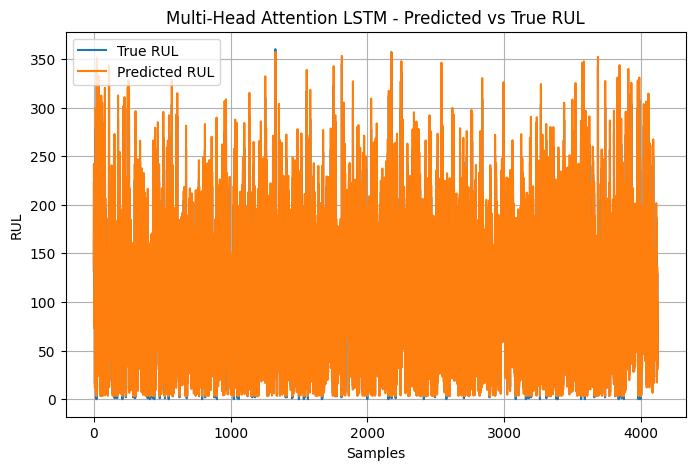

In [115]:
#predicted vs true RUL

# Predict RUL on validation data
y_pred_multi_att_lstm = multi_att_lstm_model.predict(X_val)

# Plot predicted vs true RUL
plt.figure(figsize=(8, 5))
plt.plot(y_val, label='True RUL')
plt.plot(y_pred_multi_att_lstm, label='Predicted RUL')
plt.title("Multi-Head Attention LSTM - Predicted vs True RUL")
plt.xlabel("Samples")
plt.ylabel("RUL")
plt.legend()
plt.grid(True)
plt.show()


In [116]:
plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_pred, alpha=0.6)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.xlabel('True RUL')
plt.ylabel('Predicted RUL')
plt.title('True vs Predicted RUL (Scatter)')
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'y_true' is not defined

<Figure size 600x600 with 0 Axes>

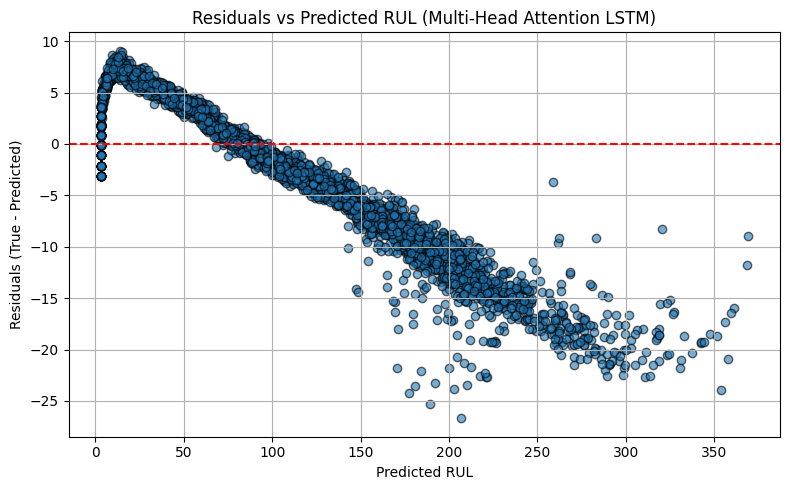

In [90]:
#residual vs predicted plot

# Flatten predictions and true values to ensure correct shape
y_pred = y_pred_multi_att_lstm.flatten()
y_true = y_val.flatten()

# Calculate residuals
residuals_multi_att_lstm = y_true - y_pred

# Plot residuals vs predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals_multi_att_lstm, alpha=0.6, edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.title("Residuals vs Predicted RUL (Multi-Head Attention LSTM)")
plt.xlabel("Predicted RUL")
plt.ylabel("Residuals (True - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()

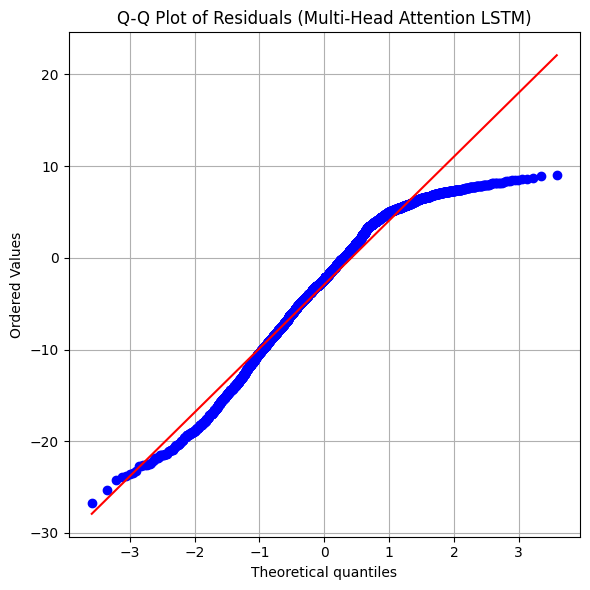

In [91]:
#Q-Q plot

import scipy.stats as stats

# Q-Q plot for residuals
plt.figure(figsize=(6, 6))
stats.probplot(residuals_multi_att_lstm, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals (Multi-Head Attention LSTM)")
plt.grid(True)
plt.tight_layout()
plt.show()

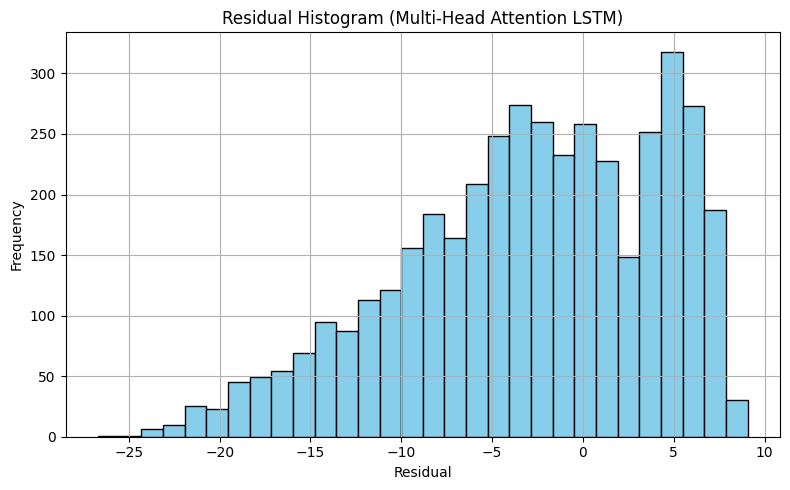

In [92]:
#residual histogram

# Histogram of residuals
plt.figure(figsize=(8, 5))
plt.hist(residuals_multi_att_lstm, bins=30, edgecolor='black', color='skyblue')
plt.title("Residual Histogram (Multi-Head Attention LSTM)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

In [93]:
#store the results

# Store predictions and residuals in a dictionary for later comparison
results_multi_att_lstm = {
    'model': 'Multi-Head Attention LSTM',
    'y_true': y_true,
    'y_pred': y_pred,
    'residuals': residuals_multi_att_lstm
}


In [95]:
# Save using native Keras format (recommended)
multi_att_lstm_model.save("multihead_attention_lstm_model.keras")

# Load it back properly
from tensorflow.keras.models import load_model
loaded_multi_att_lstm_model = load_model("multihead_attention_lstm_model.keras")  # No compile=True needed


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 19 variables whereas the saved optimizer has 36 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [101]:
#Define the model (CNN + LightGBM Hybrid)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import lightgbm as lgb

# Assuming X_train, X_val are defined earlier for LSTM/BiLSTM
X_cnn = X_train  # or X_val, whichever you deem appropriate

# Now define the CNN model
cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=X_cnn.shape[1:]),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(1)  # Output a single value for RUL prediction
])

cnn_model.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [106]:


#instantiate and train

# Fit CNN
cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1) # Changed the second X_train to y_train

# Assuming 'unit_number' is available in the original df_engineered
# Get the last `X_test.shape[0]` unit numbers from df_engineered
unit_numbers_test = df_engineered['unit_number'].tail(X_test.shape[0]).values

# Select the corresponding rows from df_engineered to form X_test_engineered
# This ensures X_test_engineered has all the necessary columns
X_test_engineered = df_engineered.iloc[-X_test.shape[0]:].copy()

# Now you can apply create_rolling_features
X_test_engineered, _ = create_rolling_features(X_test_engineered, window_size=5)

# Handle missing values
X_test_engineered = X_test_engineered.fillna(method='ffill').fillna(method='bfill')

# Now reshape the data using the engineered features
X_test_reshaped = reshape_data(X_test_engineered[features_for_model].values, seq_len)

# Extract CNN features
cnn_features_train = cnn_model.predict(X_train)
cnn_features_test = cnn_model.predict(X_test_reshaped)  # Use reshaped X_test

# Train LightGBM model on extracted CNN features
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(cnn_features_train, y_train)

Epoch 1/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3979 - val_loss: 0.0541
Epoch 2/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1597 - val_loss: 0.0751
Epoch 3/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4232 - val_loss: 0.4419
Epoch 4/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3456 - val_loss: 0.0301
Epoch 5/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1410 - val_loss: 0.0452
Epoch 6/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0688 - val_loss: 0.0960
Epoch 7/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2866 - val_loss: 0.5548
Epoch 8/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4177 - val_loss: 0.0187
Epoch 9/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2211 - val_loss: 0.1533
Epoch 10/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0720 - val_loss: 0.0510


<ipython-input-106-b58988bfb6b7>:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_test_engineered = X_test_engineered.fillna(method='ffill').fillna(method='bfill')


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000517 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 16481, number of used features: 1
[LightGBM] [Info] Start training from score 107.618409


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LGBMRegressor()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


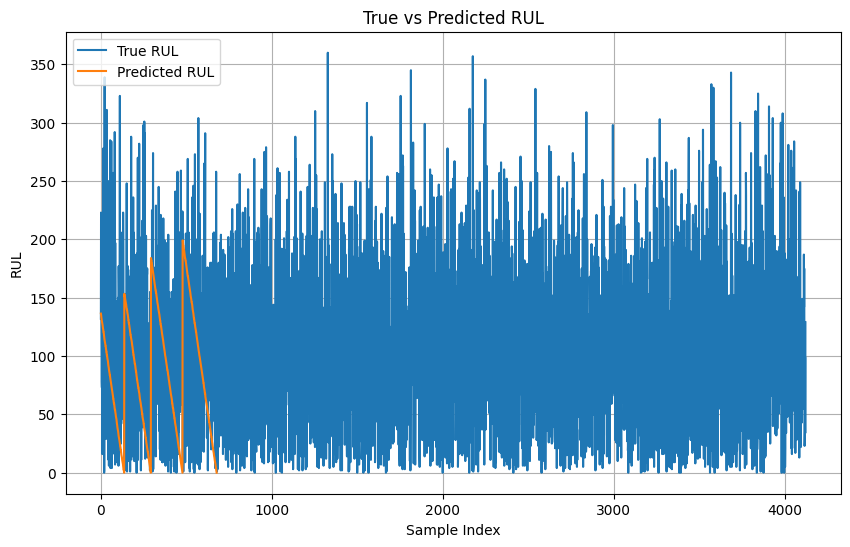

In [108]:
#predicted vs true rul

predictions = lgb_model.predict(cnn_features_test)

plt.figure(figsize=(10, 6))
plt.plot(y_val, label='True RUL') # Replace y_test with y_val as it was used for validation set
plt.plot(predictions, label='Predicted RUL')
plt.xlabel("Sample Index")
plt.ylabel("RUL")
plt.title("True vs Predicted RUL")
plt.legend()
plt.grid(True)
plt.show()

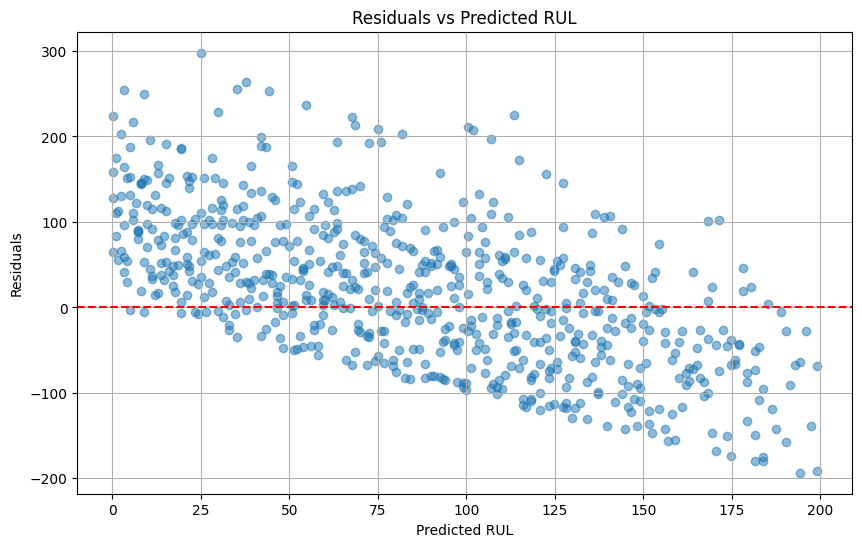

In [111]:
#residual vs predicted plot

# Assuming you have already made predictions as:
# predictions = lgb_model.predict(cnn_features_test)

# Ensure predictions and y_val have the same length for proper comparison
min_len = min(len(y_val), len(predictions))
y_val_truncated = y_val[:min_len]  # Truncate to the smaller length
predictions_truncated = predictions[:min_len]

# Now calculate residuals
residuals = y_val_truncated - predictions_truncated

# Continue with your plotting code...
plt.figure(figsize=(10, 6))
plt.scatter(predictions_truncated, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted RUL")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted RUL")
plt.grid(True)
plt.show()

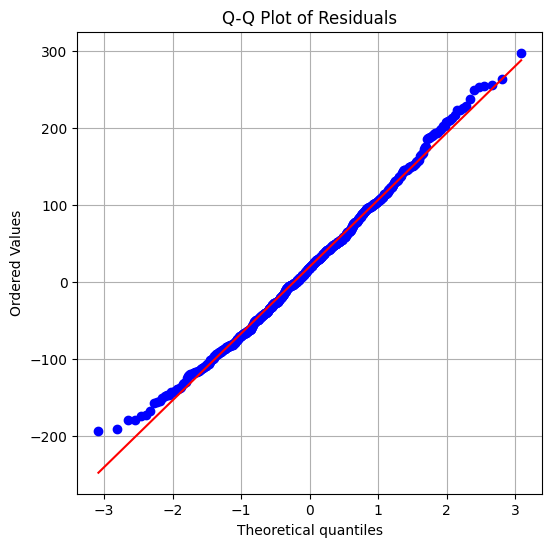

In [112]:
#Q-Q plot

import scipy.stats as stats

plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.grid(True)
plt.show()


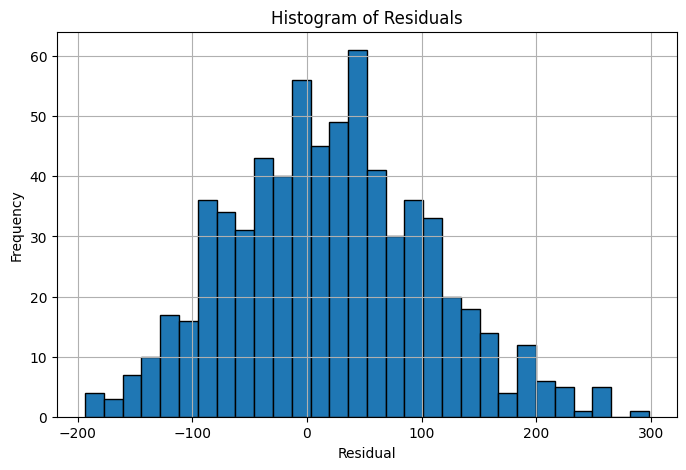

In [113]:
#residual histogram

plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [115]:
#store the results

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Ensure predictions and y_val have the same length for proper comparison
min_len = min(len(y_val), len(predictions))
y_val_truncated = y_val[:min_len]  # Truncate to the smaller length
predictions_truncated = predictions[:min_len]

results_cnn_lgb = {
    "RMSE": sqrt(mean_squared_error(y_val_truncated, predictions_truncated)), # Use y_val_truncated instead of y_test
    "MAE": mean_absolute_error(y_val_truncated, predictions_truncated), # Use y_val_truncated instead of y_test
    "R2": r2_score(y_val_truncated, predictions_truncated) # Use y_val_truncated instead of y_test
}

In [117]:
#save and load the model

import joblib

# Save using the model's save() method
cnn_model.save("cnn_model.keras")
joblib.dump(lgb_model, "lightgbm_model.pkl")


# Load them
cnn_model_loaded = tf.keras.models.load_model("cnn_model.keras")
lgb_model_loaded = joblib.load("lightgbm_model.pkl")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [70]:
#Add evaluation metrics of above two models to the table in the below cell

In [122]:
from tabulate import tabulate
from math import sqrt

# Define all results dictionaries if not already
results_lr = {"RMSE": sqrt(mean_squared_error(test_data["true_RUL"], test_data["pred_lr"])),
              "MAE": mean_absolute_error(test_data["true_RUL"], test_data["pred_lr"]),
              "R2": r2_score(test_data["true_RUL"], test_data["pred_lr"])}

results_naive = {"RMSE": sqrt(mean_squared_error(test_data["true_RUL"], test_data["pred_naive"])),
                 "MAE": mean_absolute_error(test_data["true_RUL"], test_data["pred_naive"]),
                 "R2": r2_score(test_data["true_RUL"], test_data["pred_naive"])}

results_mavg = {"RMSE": sqrt(mean_squared_error(test_data["true_RUL"], test_data["pred_mavg"])),
                "MAE": mean_absolute_error(test_data["true_RUL"], test_data["pred_mavg"]),
                "R2": r2_score(test_data["true_RUL"], test_data["pred_mavg"])}

results_multiatt_lstm = { "RMSE": sqrt(mean_squared_error(y_true, y_pred)),
                          "MAE": mean_absolute_error(y_true, y_pred),
                          "R2": r2_score(y_true, y_pred)
}

results_cnn_lgb = { "RMSE": sqrt(mean_squared_error(y_val_truncated, predictions_truncated)),
                    "MAE": mean_absolute_error(y_val_truncated, predictions_truncated),
                    "R2": r2_score(y_val_truncated, predictions_truncated)

}

# Create comparison table
comparison_table = [
    ["Linear Regression", results_lr["RMSE"], results_lr["MAE"], results_lr["R2"]],
    ["Naive", results_naive["RMSE"], results_naive["MAE"], results_naive["R2"]],
    ["Moving Average", results_mavg["RMSE"], results_mavg["MAE"], results_mavg["R2"]],
    ["LSTM", results_lstm["RMSE"], results_lstm["MAE"], results_lstm["R2"]],
    ["BiLSTM", results_bilstm["RMSE"], results_bilstm["MAE"], results_bilstm["R2"]],
    ["CNN-LSTM", results_cnnlstm["RMSE"], results_cnnlstm["MAE"], results_cnnlstm["R2"]],
    ["Transformer", results_transformer["RMSE"], results_transformer["MAE"], results_transformer["R2"]],
    ["Multi-head Attention LSTM", results_multiatt_lstm["RMSE"], results_multiatt_lstm["MAE"], results_multiatt_lstm["R2"]],
    ["CNN + LightGBM", results_cnn_lgb["RMSE"], results_cnn_lgb["MAE"], results_cnn_lgb["R2"]],
]

# Display table
print(tabulate(comparison_table, headers=["Model", "RMSE", "MAE", "R²"], tablefmt="grid", floatfmt=".4f"))


+---------------------------+----------+----------+----------+
| Model                     |     RMSE |      MAE |       R² |
+===========================+==========+==========+==========+
| Linear Regression         |  55.6757 |  45.8637 |  -0.1884 |
+---------------------------+----------+----------+----------+
| Naive                     | 320.8212 | 313.2249 | -38.4597 |
+---------------------------+----------+----------+----------+
| Moving Average            |  75.9537 |  65.4008 |  -1.2117 |
+---------------------------+----------+----------+----------+
| LSTM                      |  39.5550 |  19.1165 |   0.5910 |
+---------------------------+----------+----------+----------+
| BiLSTM                    |  23.3443 |   7.9105 |   0.8576 |
+---------------------------+----------+----------+----------+
| CNN-LSTM                  |  39.6827 |  19.2285 |   0.5884 |
+---------------------------+----------+----------+----------+
| Transformer               |   8.1478 |   4.6648 |   0